In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
import xgboost as xgb
import matplotlib
import torch
import torch.utils.data as data_utils
import torch.nn as nn
import tensorflow as tf
import imblearn
from sklearn.model_selection import train_test_split
import collections

In [2]:
date='16Mar2021'
dir_name='/preprocessing/200PU_2806'
workdir=os.getcwd()
files_dir='/data_cms_upgrade/hakimi'
os.makedirs(workdir+dir_name, exist_ok=True)
data_dir=workdir+dir_name
genptcut=20
cl3dptcut=5
PU_cut = 20
etamin=1.6
etamax=2.9
#bkg='pions' # 'pions' or 'PU'
standardize = "_unstandardized"
feature_set=16 # 1: baseline 4: minimal, 10-13 + new vars (12 -> PU 13-> pions)
opti=False
#res_dir=workdir+'/res/res_pt{}_vs{}_featset{}{}'.format(genptcut, bkg, feature_set, standardize)
#os.makedirs(res_dir, exist_ok=True)
from collections import Counter
count=Counter

In [3]:
data=pd.DataFrame()
for sample in ['elec', 'pions', 'PU', 'QCD']:
    columns=['genpart_exeta',
             'genpart_pt',
     'cl3d_pt',
     'cl3d_eta',
     'cl3d_showerlength',
     'cl3d_coreshowerlength',
     'cl3d_firstlayer',
     'cl3d_maxlayer',
     'cl3d_seetot',
     'cl3d_seemax',
     'cl3d_spptot',
     'cl3d_sppmax',
     'cl3d_szz',
     'cl3d_srrtot',
     'cl3d_srrmax',
     'cl3d_srrmean',
     'cl3d_emaxe',
     'cl3d_hoe',
     'cl3d_meanz',
     'cl3d_layer10',
     'cl3d_layer50',
     'cl3d_layer90',
     'cl3d_ntc67',
     'cl3d_ntc90',
     'layer',
     'sample',
      'matches',

            ]

    if sample == 'QCD':
        columns =['event', 'genjet_n', 'genjet_energy', 'genjet_pt', 'genjet_eta',
           'genjet_phi', 'cl3d_pt', 'cl3d_energy', 'cl3d_eta',
           'cl3d_phi', 
           'cl3d_showerlength', 'cl3d_coreshowerlength', 'cl3d_firstlayer',
           'cl3d_maxlayer', 'cl3d_seetot', 'cl3d_seemax', 'cl3d_spptot',
           'cl3d_sppmax', 'cl3d_szz', 'cl3d_srrtot', 'cl3d_srrmax', 'cl3d_srrmean',
           'cl3d_emaxe', 'cl3d_hoe', 'cl3d_meanz', 'cl3d_layer10', 'cl3d_layer50',
           'cl3d_layer90', 'cl3d_ntc67', 'cl3d_ntc90', 'layer', 'deta', 'dphi',
           'deltar', 'matches',]
    elif sample == 'PU':
        columns = ['event', 'cl3d_pt', 'cl3d_energy', 'cl3d_eta', 'cl3d_phi', 
           'cl3d_showerlength', 'cl3d_coreshowerlength', 'cl3d_firstlayer',
           'cl3d_maxlayer', 'cl3d_seetot', 'cl3d_seemax', 'cl3d_spptot',
           'cl3d_sppmax', 'cl3d_szz', 'cl3d_srrtot', 'cl3d_srrmax', 'cl3d_srrmean',
           'cl3d_emaxe', 'cl3d_hoe', 'cl3d_meanz', 'cl3d_layer10', 'cl3d_layer50',
           'cl3d_layer90', 'cl3d_ntc67', 'cl3d_ntc90', 'layer',]

    df= pd.read_csv(data_dir+'/{}.csv'.format(sample), usecols=columns, low_memory=True)
    df['sample']=sample
    df['abseta']=np.abs(df['cl3d_eta'])

    if sample == 'elec':
        sel = ((np.abs(df['genpart_exeta'])>etamin) & (np.abs(df['genpart_exeta'])<etamax )
           & (df['genpart_pt']>genptcut)&  (df['cl3d_pt']>cl3dptcut) 
           &(df['abseta']>etamin) & (df['abseta']<etamax ))

    if sample == 'QCD':
        sel = ((np.abs(df['cl3d_eta'])>etamin) & (np.abs(df['cl3d_eta'])<etamax )&(df['cl3d_pt']>cl3dptcut))
    if sample == 'pions':
        sel =  ((np.abs(df['genpart_exeta'])>etamin) & (np.abs(df['genpart_exeta'])<etamax )
           & (df['genpart_pt']>genptcut)&  (df['cl3d_pt']>cl3dptcut) 
           &(df['abseta']>etamin) & (df['abseta']<etamax ))
    if sample == 'PU':
        sel = ((np.abs(df['cl3d_eta'])>etamin) & (np.abs(df['cl3d_eta'])<etamax )&(df['cl3d_pt']>PU_cut))
    df_cut=df[sel]
    df_cut.dropna(inplace=True)
    print(sample, count(df_cut['sample']))
    data=data.append(df_cut)
    print(sample, count(data['sample']))

/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


elec Counter({'elec': 207350})
elec Counter({'elec': 207350})
pions Counter({'pions': 6756})
pions Counter({'elec': 207350, 'pions': 6756})
PU Counter({'PU': 29489})


/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


PU Counter({'elec': 207350, 'PU': 29489, 'pions': 6756})
QCD Counter({'QCD': 135546})
QCD Counter({'elec': 207350, 'QCD': 135546, 'PU': 29489, 'pions': 6756})


In [4]:
%%time
#cut
algo_cut={}

def tolist(x):
    x.test=x.layer[1:-1].split(',')
    return x.test

#cut on cl3deta

sel=(data['abseta']>etamin) & (data['abseta']<etamax)
df_cut=data[sel]
print(count(df_cut['sample']))
print('cl3d eta cut:', len(df_cut), len(df_cut[df_cut['sample']=='elec']))
#print('PU: ', len(df_cut[df_cut['sample']=='PU']))
#layer_pt preproc
df_cut['layer_pt']=df_cut.apply(tolist, axis=1)
df_cut.drop('layer', axis=1, inplace=True)
print(count(df_cut['sample']))
print("done")
def layering (x):
    return float(x.layer_pt[n])

##besoin de créer une variable par layer?
algo_layer={}
n_layers=len(df_cut['layer_pt'].iloc[0])
#print(n_layers)
layer_columns=[]

for n in range(n_layers):
    print('layering: {}/{}\r'.format(n+1,n_layers),end='', flush=True)
    df_cut['layer_{}'.format(n)]=df_cut.apply(layering, axis=1)
    layer_columns.append('layer_{}'.format(n))
print("done layering")



Counter({'elec': 207350, 'QCD': 135546, 'PU': 29489, 'pions': 6756})
cl3d eta cut: 379141 207350
Counter({'elec': 207350, 'QCD': 135546, 'PU': 29489, 'pions': 6756})
done
done layering36
CPU times: user 5min 3s, sys: 29.2 s, total: 5min 32s
Wall time: 5min 33s


In [5]:
# build new vars

#abseta
#df_cut['abseta']=np.abs(df_cut['cl3d_eta'])

#variance
df_cut['varee']=df_cut['cl3d_seetot']**2
df_cut['varpp']=df_cut['cl3d_spptot']**2
df_cut['varzz']=df_cut['cl3d_szz']**2
df_cut['varrr']=df_cut['cl3d_srrtot']**2

#EoT: pt(Ecal)/pt(Tot)
nLayerEcal= 14
sumE=0

sumT=0
for i in range(n_layers):
    #print('Totlayer_{}'.format(i))
    sumT+=df_cut['layer_{}'.format(i)]
    
    
for i in range(1,nLayerEcal+1):
    #print('Ecal layer_{}'.format(i))
    sumE+=df_cut['layer_{}'.format(i)]
df_cut['EoT']=sumE/sumT

#fraction of pt in first x  layers and last x layers
maxfirst = 5
maxlast=10

for n in range(1,maxfirst+1):
    Sum=0
    for i in range(1,n+1):
        Sum+=df_cut['layer_{}'.format(i)]
    df_cut['first_{}'.format(n)]= Sum/sumT
    
for n in range(1,maxlast):
    Sum=0
    #print(n, ' layers')
    for i in range(n_layers - n, n_layers):
        #print(n,i)
        Sum+=df_cut['layer_{}'.format(i)]
    #print('last_{}'.format(n), sum/sumT)
    df_cut['last_{}'.format(n)]= Sum/sumT
    
    

for n in range(1,maxfirst+1):
    Sum=0
    for i in range(1,n+1):
        #print('layer_{}'.format(nLayerEcal+i))
        Sum+=df_cut['layer_{}'.format(nLayerEcal+i)]
    df_cut['firstHcal_{}'.format(n)]= Sum/sumT
    
    
# Emaxx : pt in x layers around Elec max layer (5)
maxpos=5

#print('emax_1')
Sum=0
Sum+=df_cut['layer_{}'.format(maxpos)]
df_cut['Emax_1']=Sum/sumT
 
#print('emax_2L')
Sum=0
for i in range(maxpos-1, maxpos+1):
    #print(i)
    Sum+=df_cut['layer_{}'.format(i)]
    df_cut['Emax_2L']=Sum/sumT
    
#print('emax_2R')
Sum=0
for i in range(maxpos, maxpos+2):
    #print(i)
    Sum+=df_cut['layer_{}'.format(i)]
    df_cut['Emax_2R']=Sum/sumT
    
#print('emax_3')
Sum=0
for i in range(maxpos-1, maxpos+2):
    #print(i)
    Sum+=df_cut['layer_{}'.format(i)]
    df_cut['Emax_3']=Sum/sumT
#print('emax_4G')
Sum=0
for i in range(maxpos-2, maxpos+2):
    #print(i)
    Sum+=df_cut['layer_{}'.format(i)]
    df_cut['Emax_4L']=Sum/sumT
#print('emax_4R')
Sum=0
for i in range(maxpos-1, maxpos+3):
    #print(i)
    Sum+=df_cut['layer_{}'.format(i)]
    df_cut['Emax_4R']=Sum/sumT
#print('emax_5')
Sum=0
for i in range(maxpos-2, maxpos+3):
    #print(i)
    Sum+=df_cut['layer_{}'.format(i)]
    df_cut['Emax_5']=Sum/sumT
    
    
    
#do bitmaps with group
def ebm0(x):
    ebm=[]
    thr=0
    for i in range(1,nLayerEcal+1):
        #print(float(x.layer_pt[i])>thr)
        ebm.append(int(float(x.layer_pt[i])>thr)) 
    #print(ebm)
    return(np.array(ebm).dot(2**np.arange(len(ebm))[::-1]))
def ebm1(x):
    ebm=[]
    thr=1
    for i in range(1,nLayerEcal+1):
        #print(float(x.layer_pt[i])>thr)
        ebm.append(int(float(x.layer_pt[i])>thr)) 
    #print(ebm)
    return(np.array(ebm).dot(2**np.arange(len(ebm))[::-1]))
def hbm(x):
    ebm=[]
    thr=0
    for i in range(nLayerEcal+1,n_layers):
        #print(float(x.layer_pt[i])>thr)
        ebm.append(int(float(x.layer_pt[i])>thr)) 
    #print(ebm)
    return(np.array(ebm).dot(2**np.arange(len(ebm))[::-1]))
        
df_cut['ebm0']=df_cut.apply(ebm0, axis=1)
df_cut['ebm1']=df_cut.apply(ebm1, axis=1)
df_cut['hbm']=df_cut.apply(hbm, axis=1)

def reverse_ebm0(x):
    ebm=[]
    thr=0
    for i in range(nLayerEcal, 0, -1):
        #print(float(x.layer_pt[i])>thr)
        ebm.append(int(float(x.layer_pt[i])>thr)) 
    #print(ebm)
    return(np.array(ebm).dot(2**np.arange(len(ebm))[::-1]))
def reverse_ebm1(x):
    ebm=[]
    thr=1
    for i in range(nLayerEcal, 0, -1):
        #print(float(x.layer_pt[i])>thr)
        ebm.append(int(float(x.layer_pt[i])>thr)) 
    #print(ebm)
    return(np.array(ebm).dot(2**np.arange(len(ebm))[::-1]))
def reverse_hbm(x):
    ebm=[]
    thr=0
    for i in range(n_layers-1,nLayerEcal-1, -1):
        #print(float(x.layer_pt[i])>thr)
        ebm.append(int(float(x.layer_pt[i])>thr)) 
    #print(ebm)
    return(np.array(ebm).dot(2**np.arange(len(ebm))[::-1]))
        
df_cut['reverse_ebm0']=df_cut.apply(reverse_ebm0, axis=1)
df_cut['reverse_ebm1']=df_cut.apply(reverse_ebm1, axis=1)
df_cut['reverse_hbm']=df_cut.apply(reverse_hbm, axis=1)
print('done')



done


/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


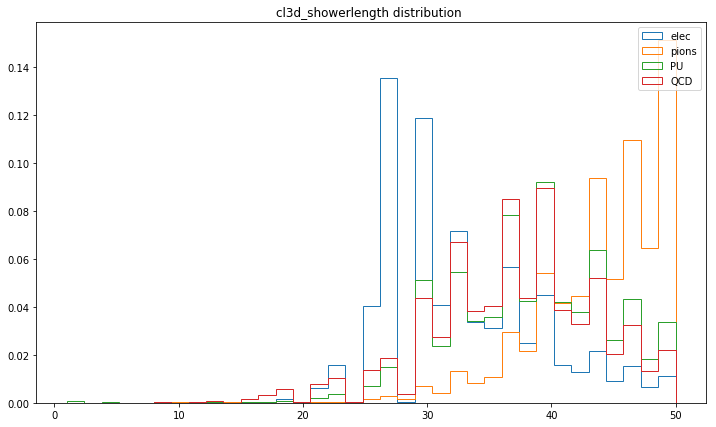

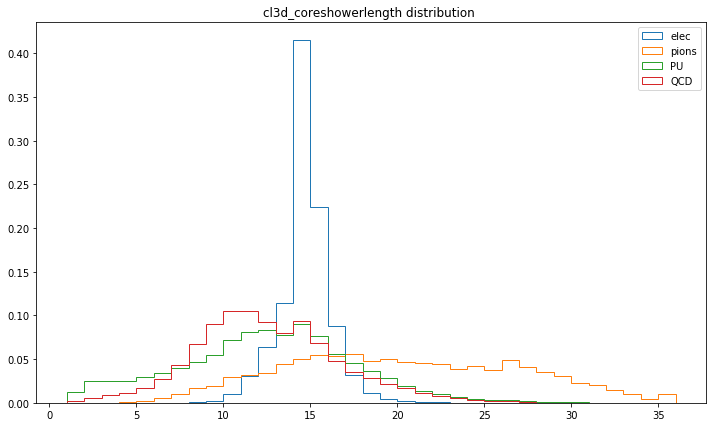

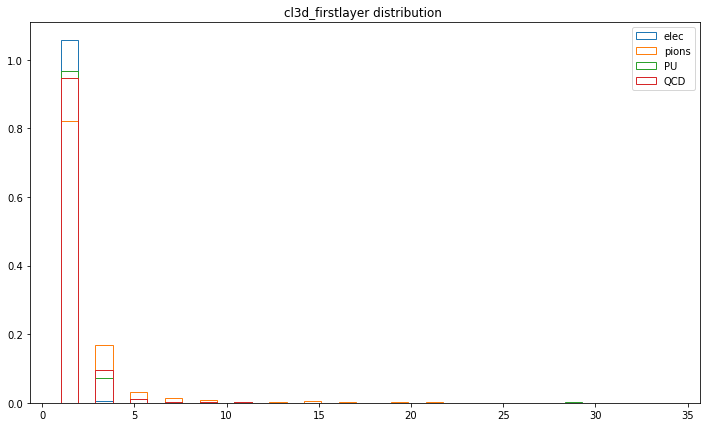

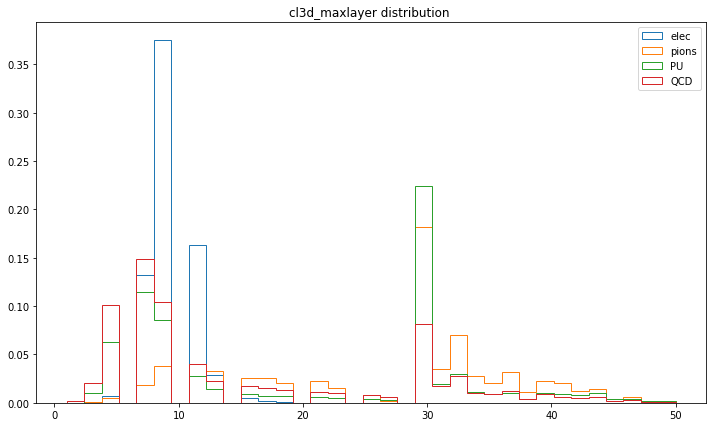

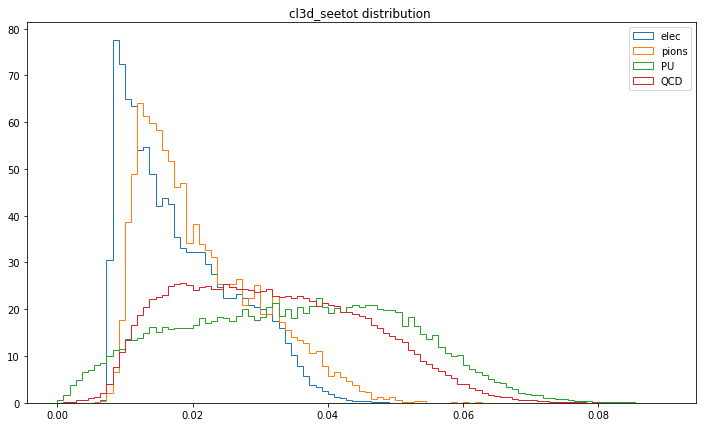

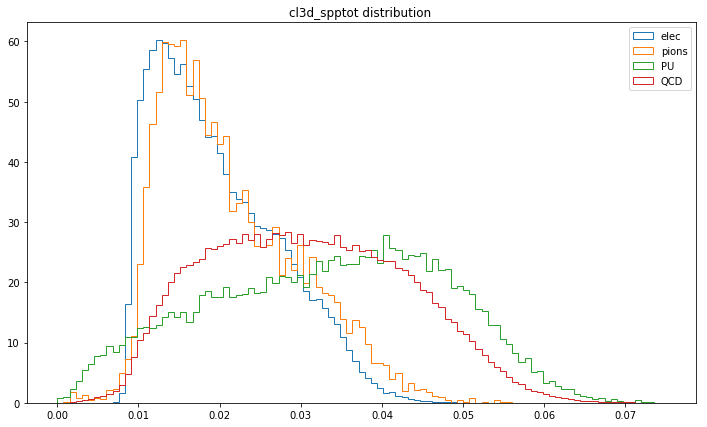

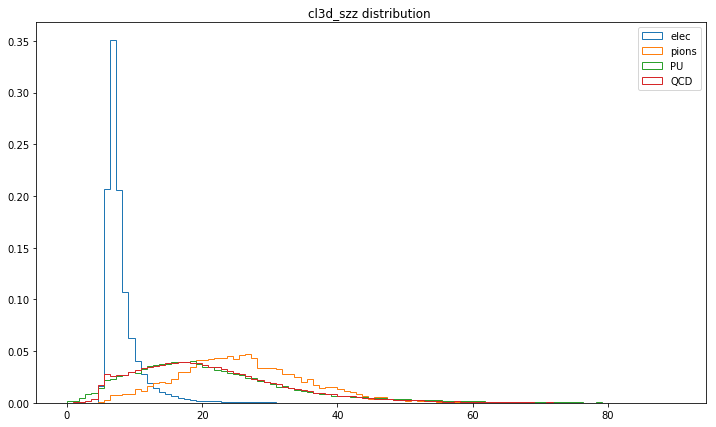

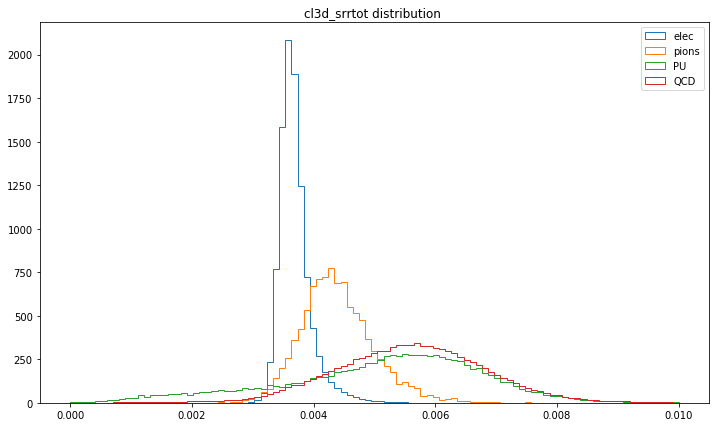

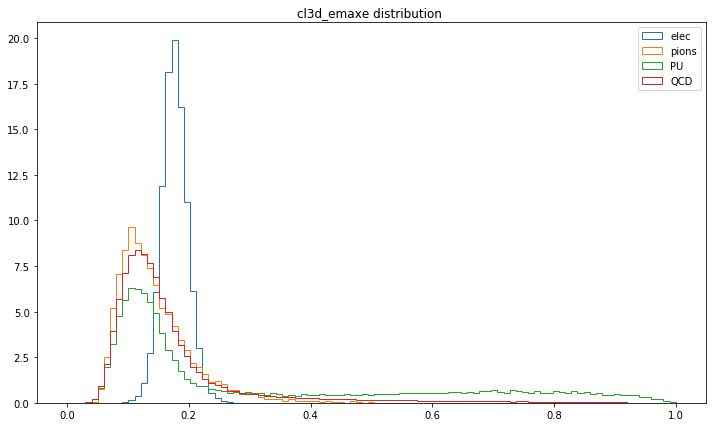

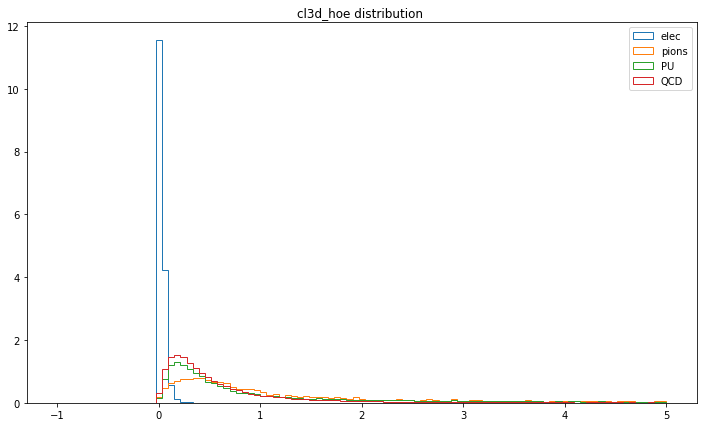

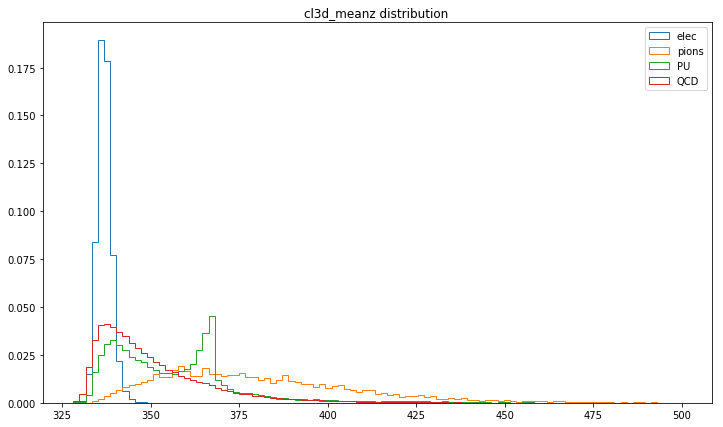

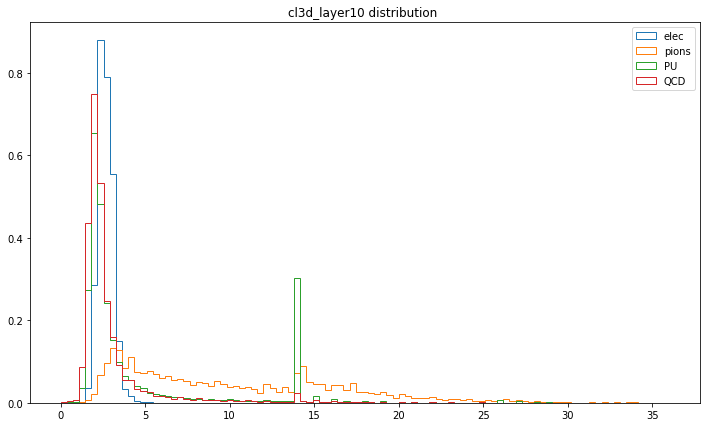

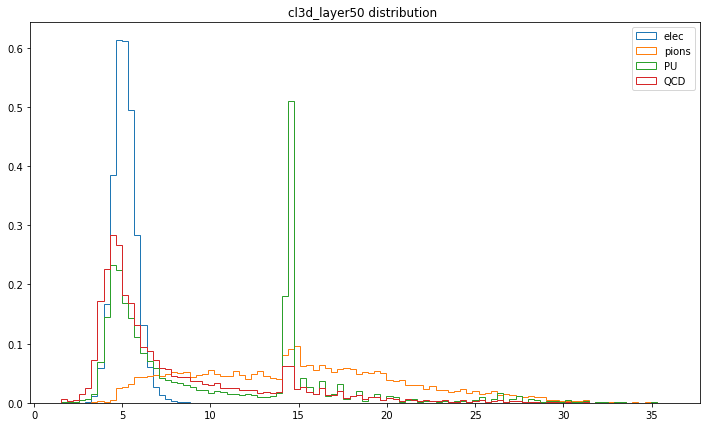

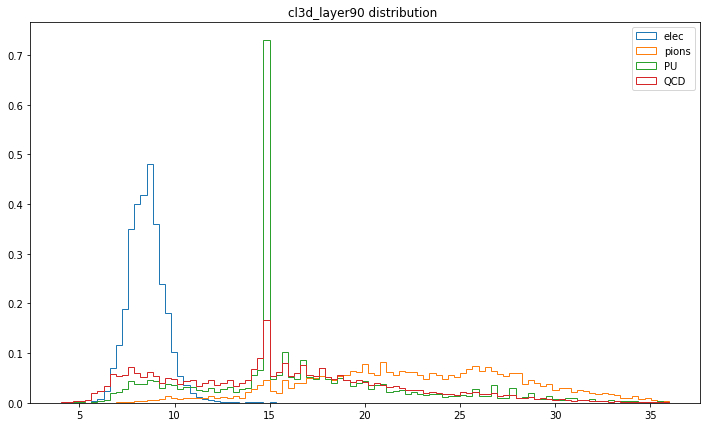

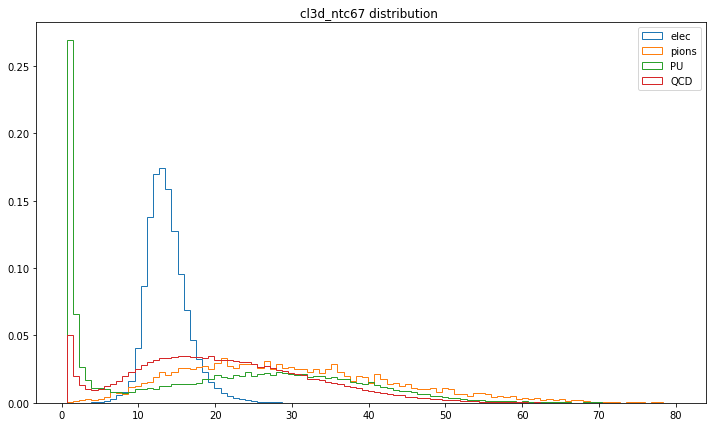

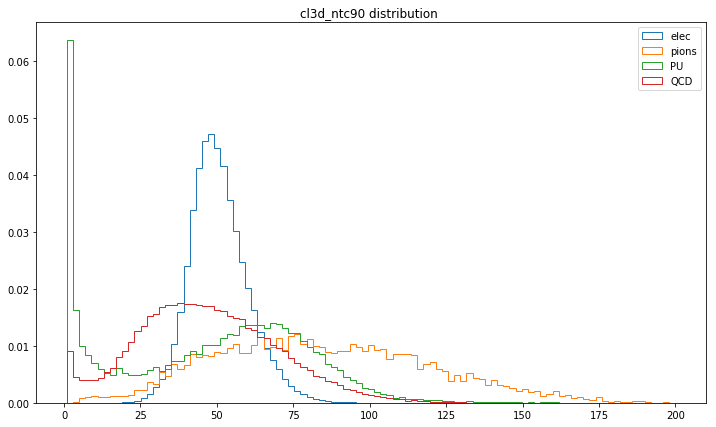

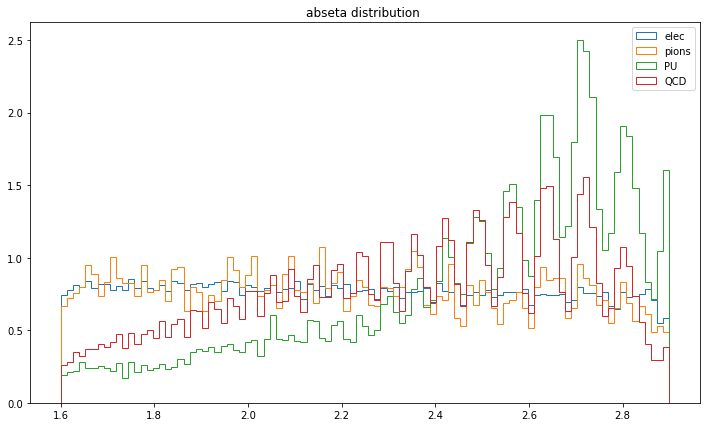

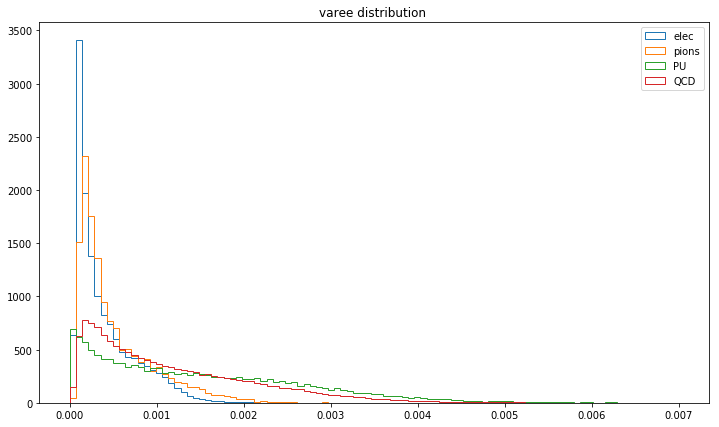

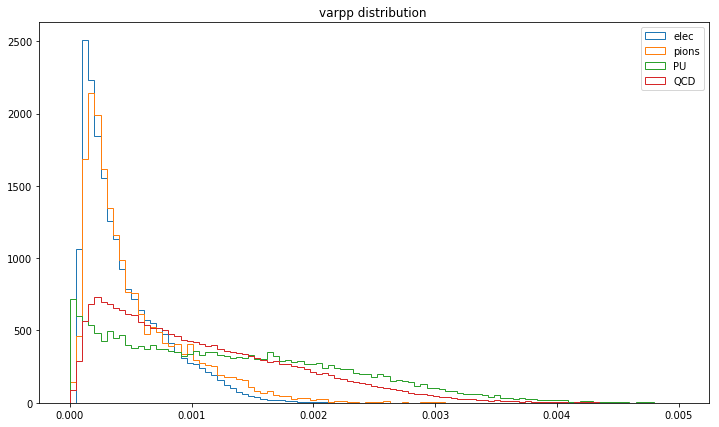

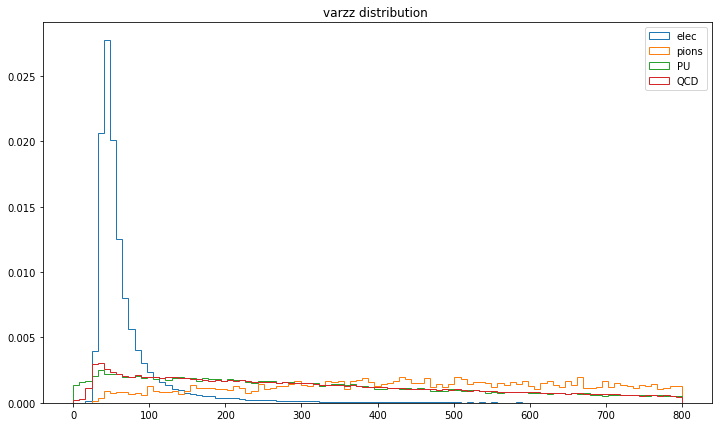

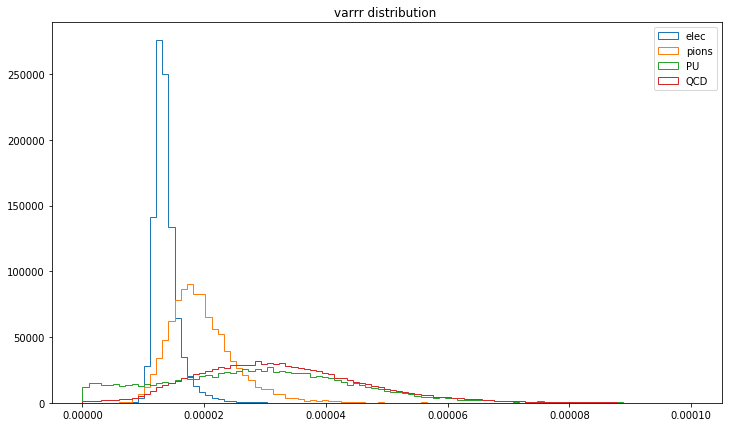

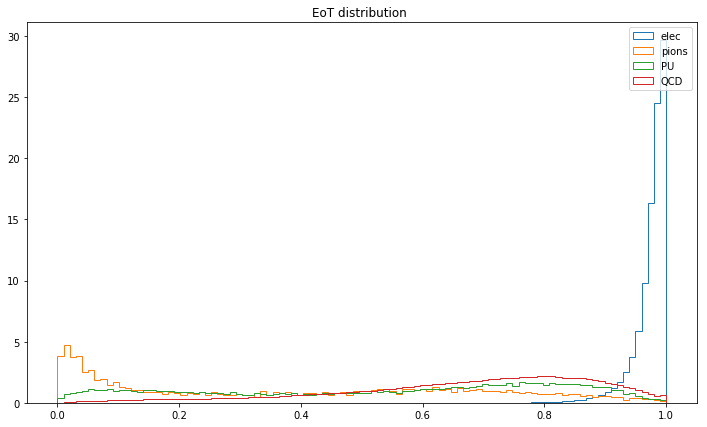

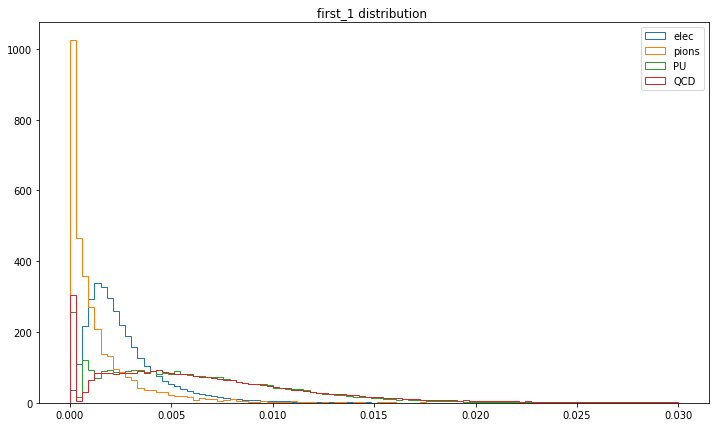

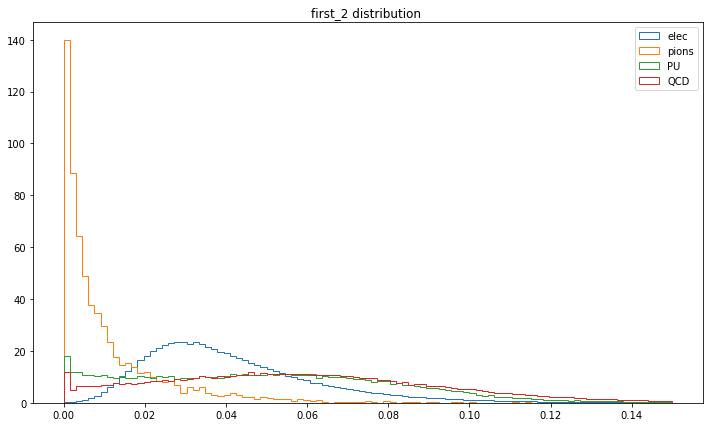

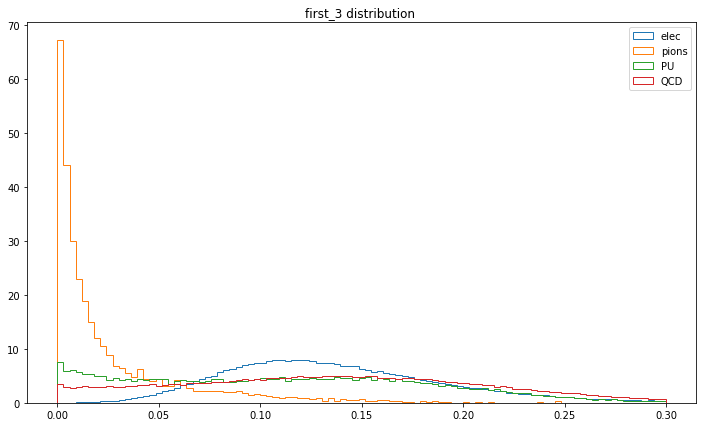

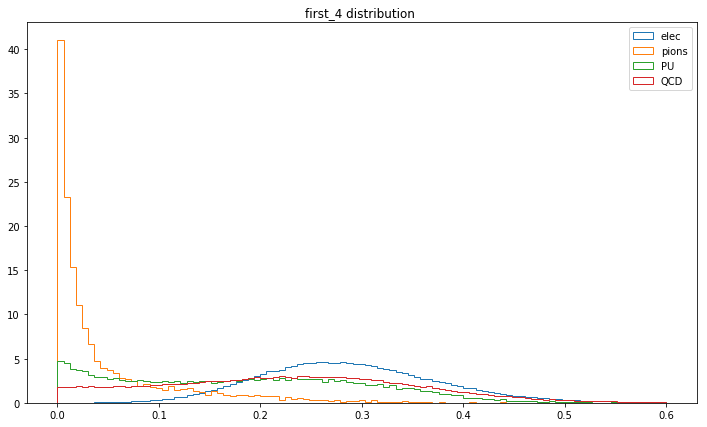

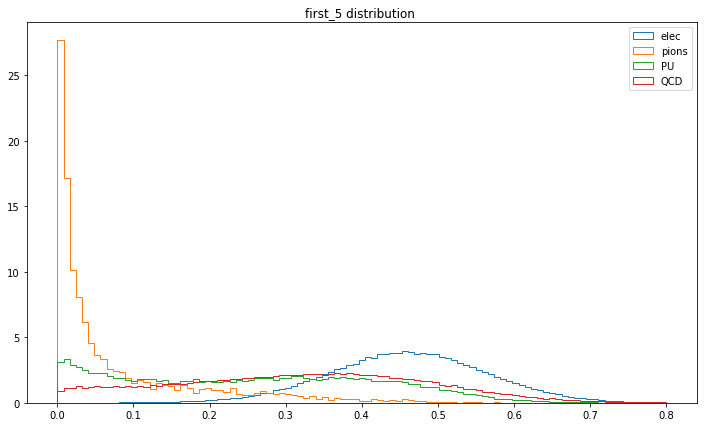

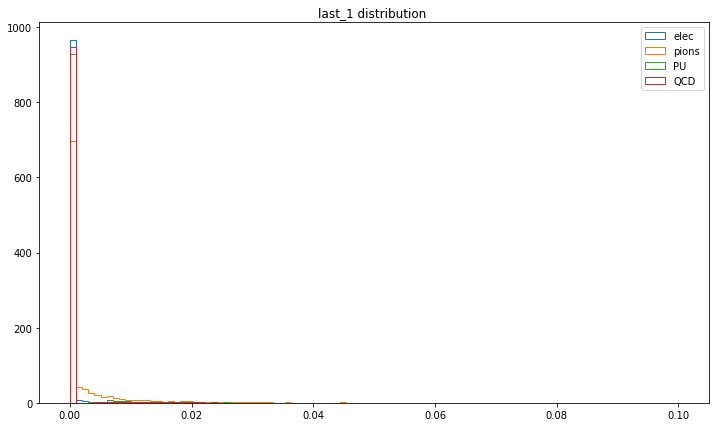

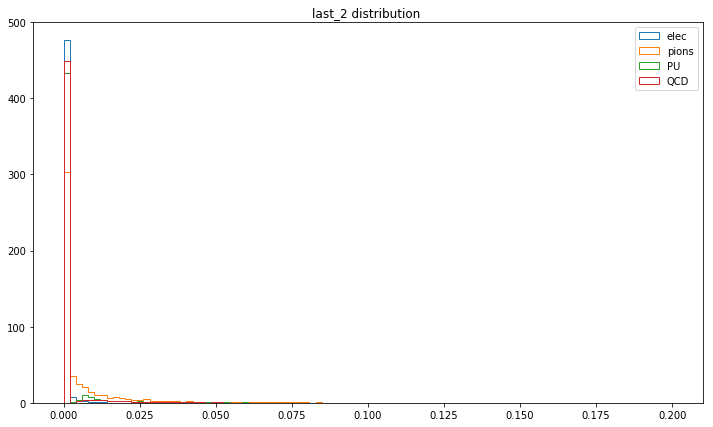

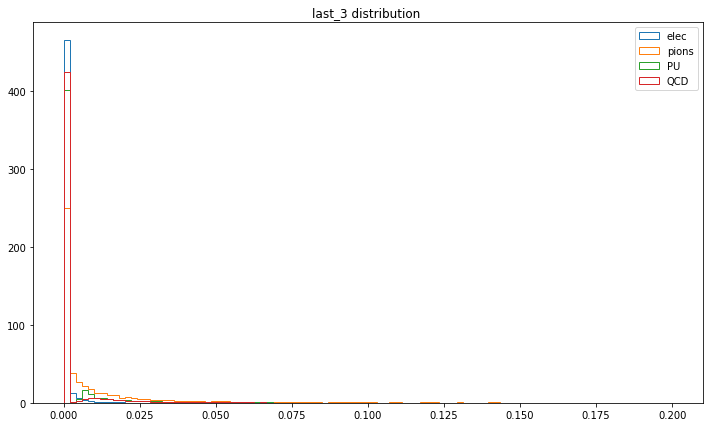

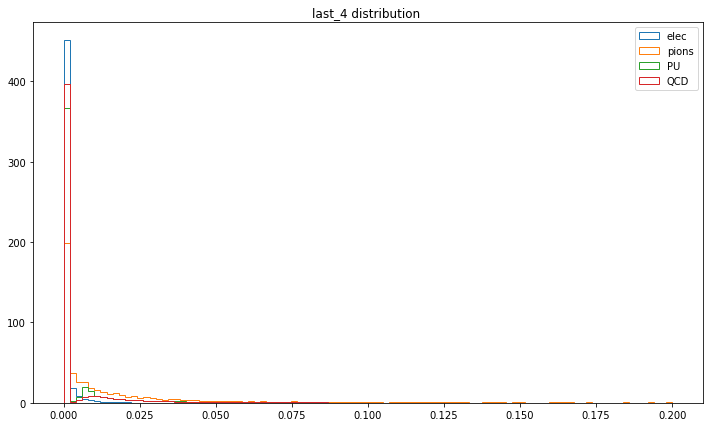

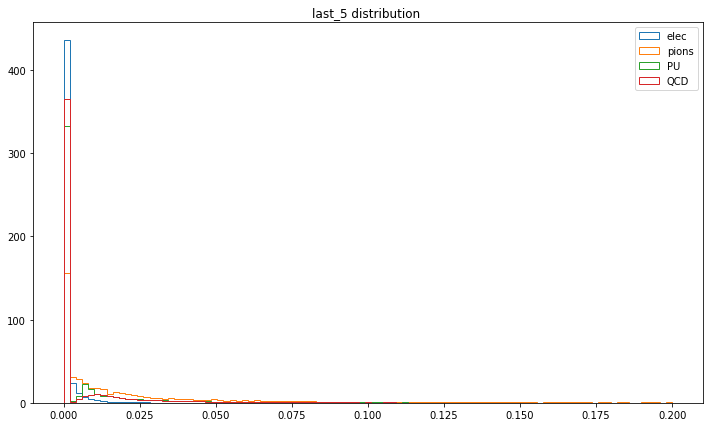

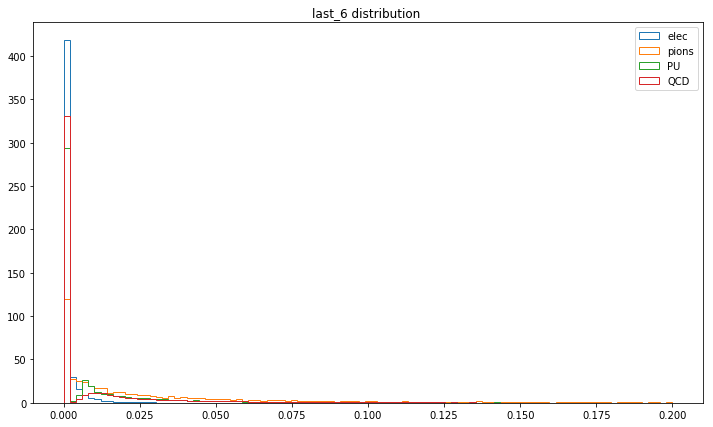

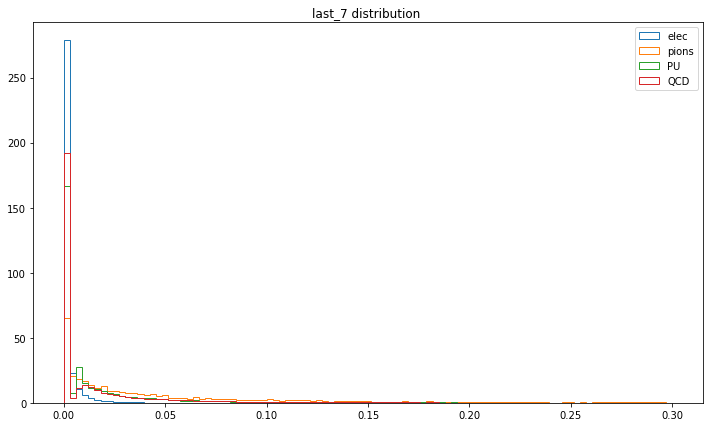

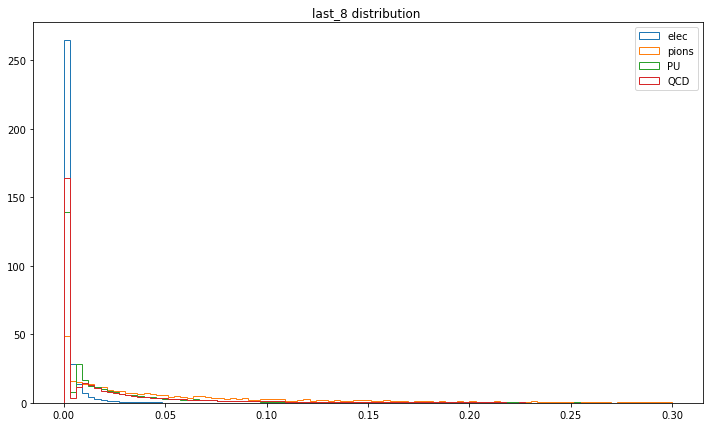

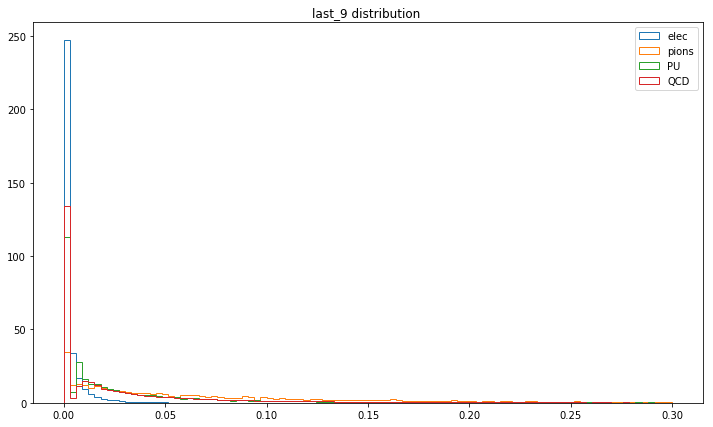

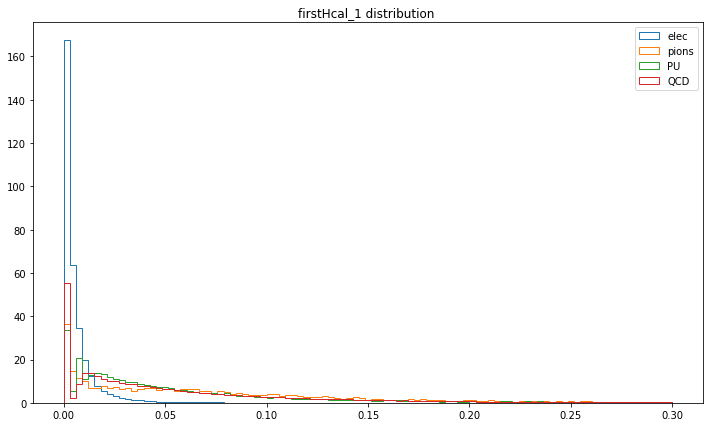

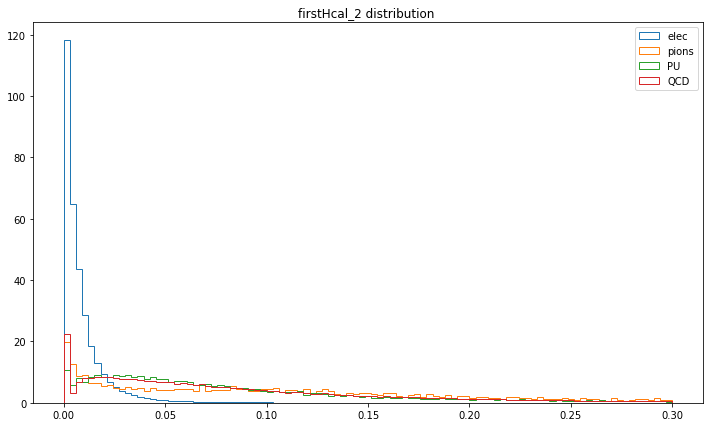

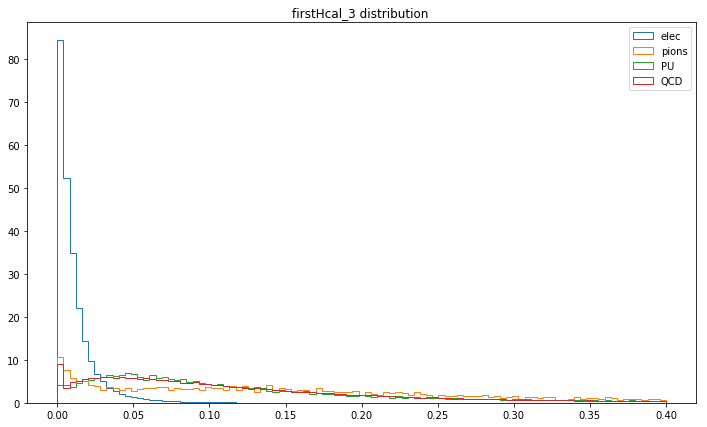

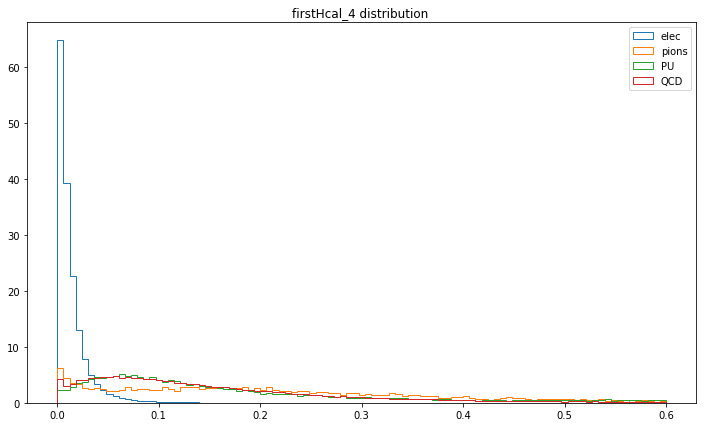

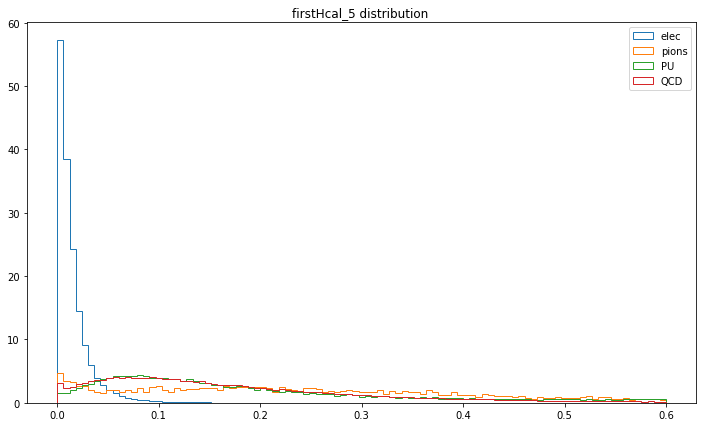

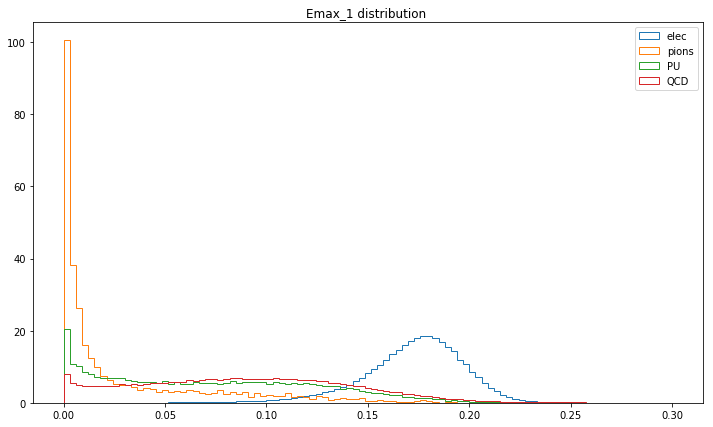

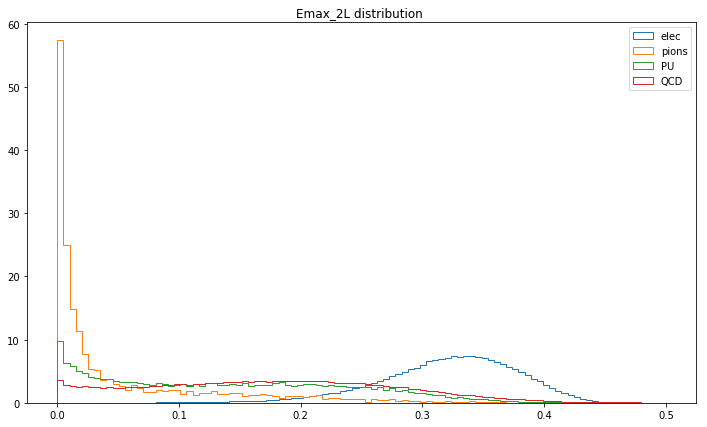

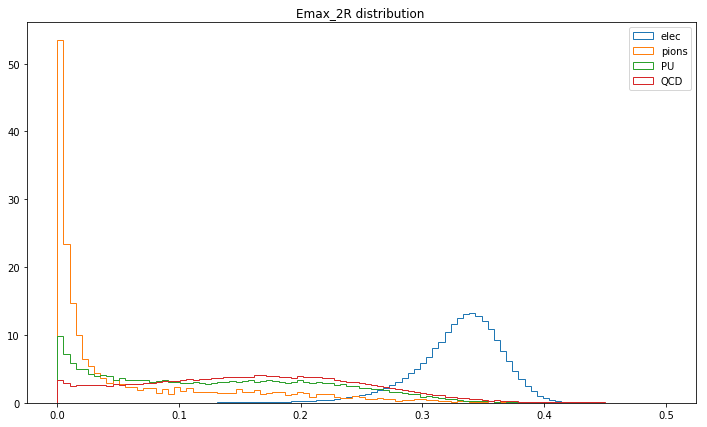

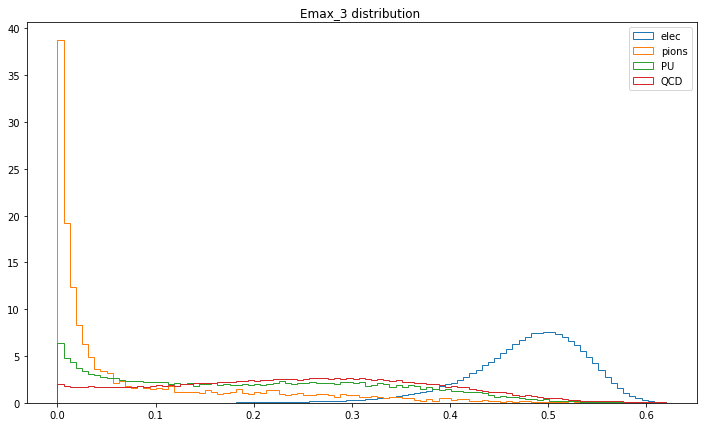

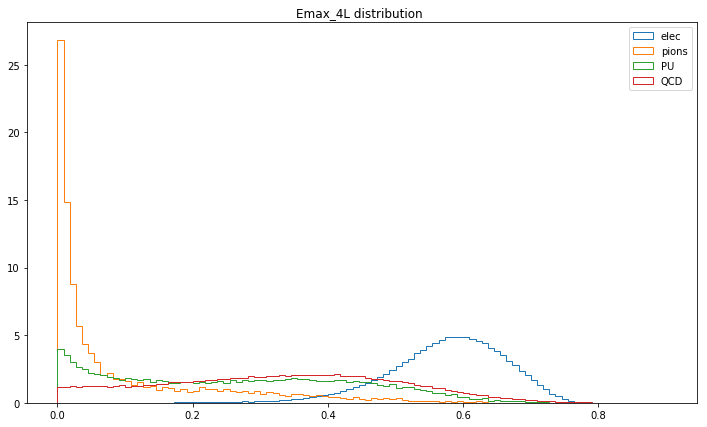

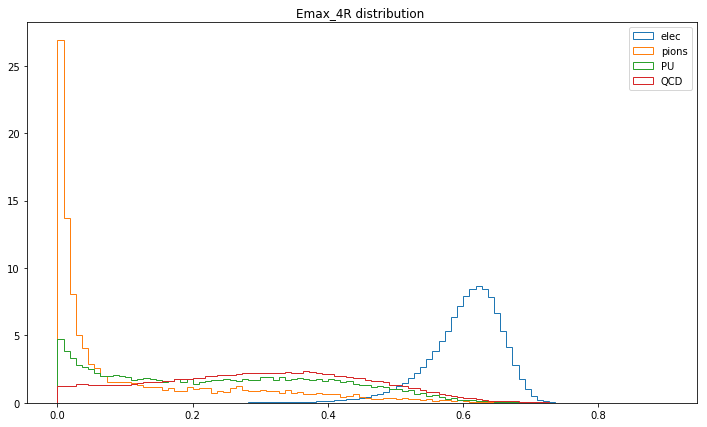

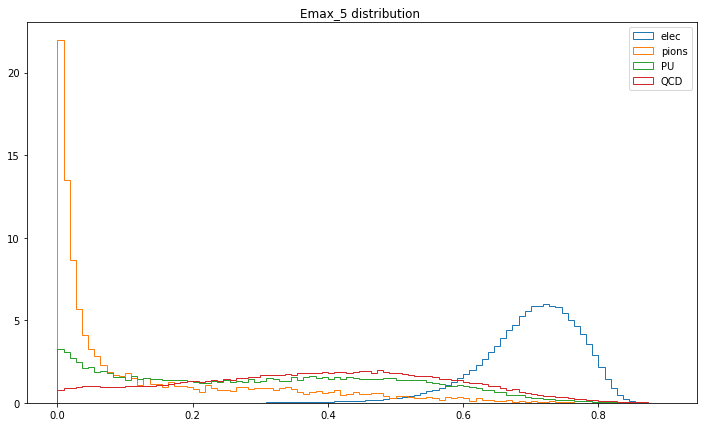

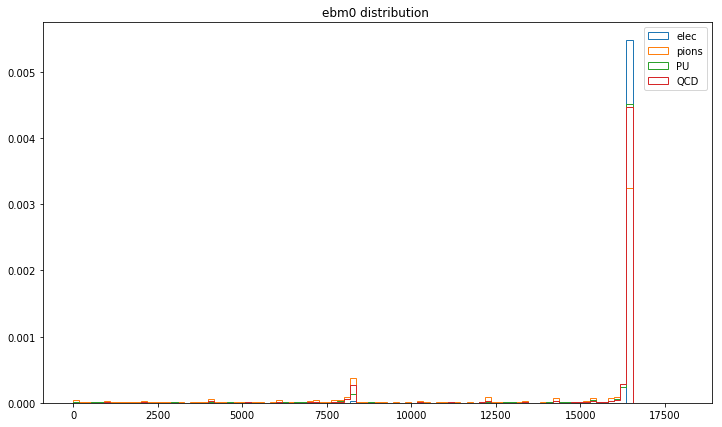

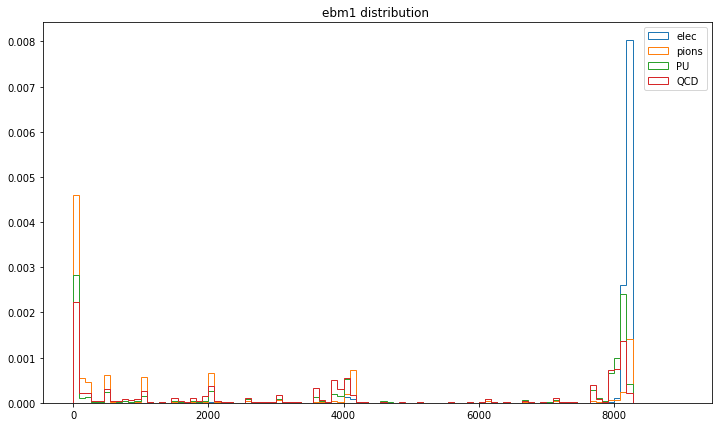

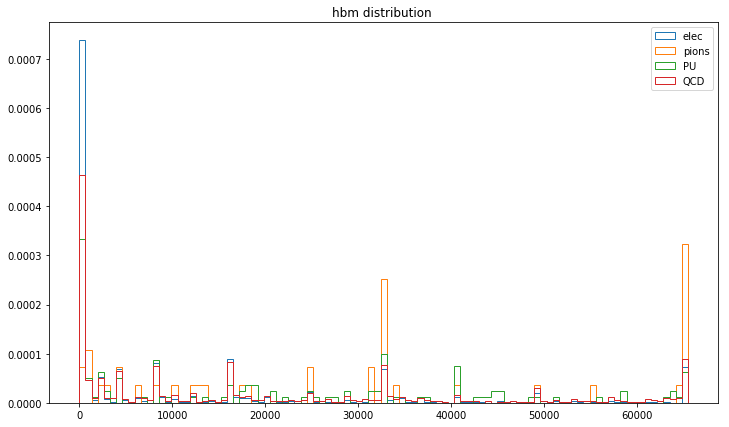

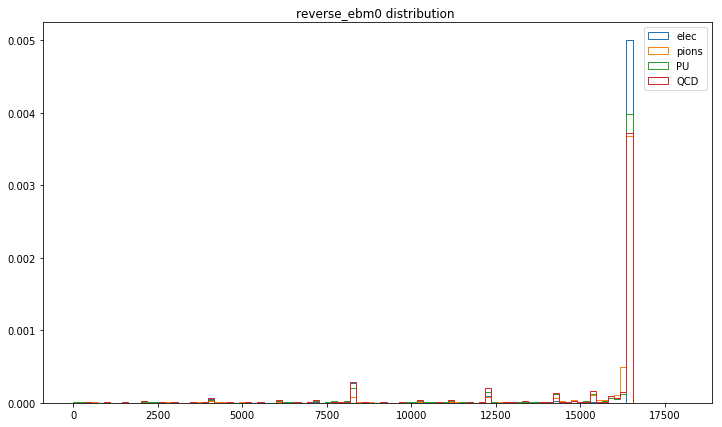

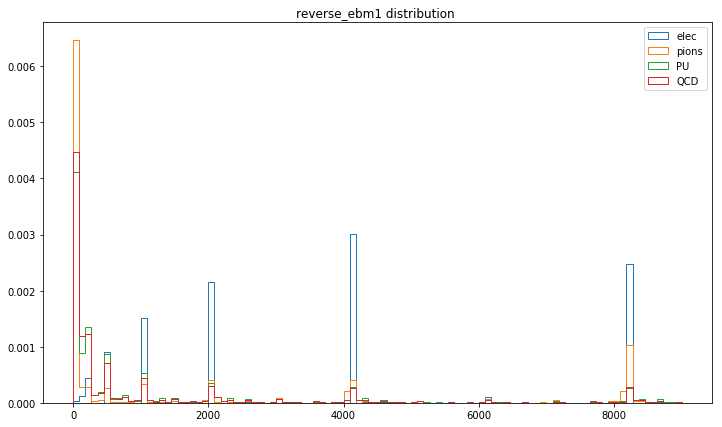

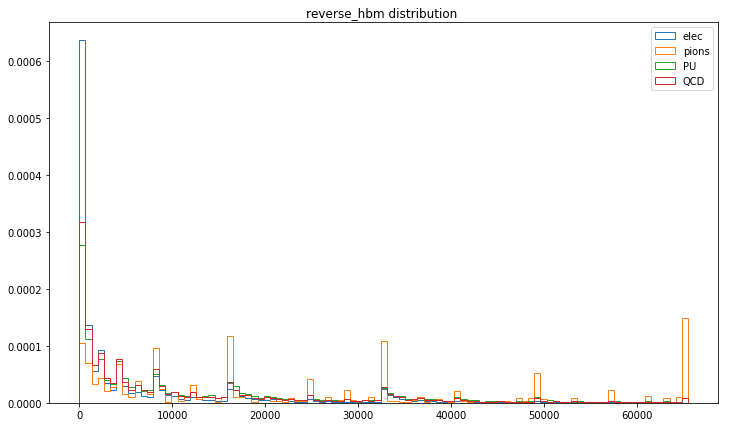

In [6]:
#plot features distrib
plot= True
if plot:
    var_list= ['cl3d_showerlength', 'cl3d_coreshowerlength', 'cl3d_firstlayer',
           'cl3d_maxlayer', 'cl3d_seetot', 'cl3d_spptot',
           'cl3d_szz', 'cl3d_srrtot',
           'cl3d_emaxe', 'cl3d_hoe', 'cl3d_meanz', 'cl3d_layer10', 'cl3d_layer50',
           'cl3d_layer90', 'cl3d_ntc67', 'cl3d_ntc90', 
           'abseta', 'varee', 'varpp', 'varzz', 'varrr', 'EoT', 'first_1', 'first_2',
            'first_3', 'first_4', 'first_5', 'last_1', 'last_2', 'last_3', 'last_4',
            'last_5', 'last_6', 'last_7', 'last_8', 'last_9', 'firstHcal_1', 'firstHcal_2',
            'firstHcal_3', 'firstHcal_4', 'firstHcal_5', 'Emax_1', 'Emax_2L', 'Emax_2R', 'Emax_3',
            'Emax_4L', 'Emax_4R', 'Emax_5', 'ebm0', 'ebm1', 'hbm', 'reverse_ebm0', 'reverse_ebm1', 'reverse_hbm']

    nbins=100
    binmin=[1, 1, 1, 1, 0, 0, 0.0, 0.0, 0., -1.0, 328.15726, 0., 1.5, 4.004325, 0.67, 0.9, 1.6, 0, 0, 0.0, 0.0,
     0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    binmax=[50.0, 36.0, 34.0, 50.0, 0.09, 0.075, 90, 0.01, 1, 5, 500, 36, 36, 36, 80, 200, 2.9, 0.007,
         0.005, 800, 0.0001, 1.0, 0.03, 0.15, 0.3, 0.6, 0.8,0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 
            0.3, 0.3,0.4, 0.6, 0.6,0.3,0.5,0.5,0.62,0.9,0.9,0.9,18000,9000,65536,18000,9000,65536]
    
    os.makedirs(workdir + '/distrib', exist_ok=True)
    for i,feat in enumerate(var_list):
        if i in [0,1,2,3]:
            nbins=36
        else: nbins= 100
        #print(feat, binmin[i], binmax[i])
        bins=np.linspace(binmin[i],binmax[i],nbins)
        plt.figure(figsize=(12,7))
        plt.hist(df_cut[feat][df_cut['sample']=='elec'], bins=bins, label='elec', density=True, histtype='step')
        plt.hist(df_cut[feat][df_cut['sample']=='pions'],bins=bins, label='pions', density=True, histtype='step')
        plt.hist(df_cut[feat][df_cut['sample']=='PU'],bins=bins, label='PU', density=True, histtype='step')
        plt.hist(df_cut[feat][df_cut['sample']=='QCD'],bins=bins, label='QCD', density=True, histtype='step')
        plt.title("{} distribution ".format(feat))
        #plt.yscale('log')
        #plt.xlim(0,36)
        plt.legend()

        plt.savefig(workdir+'/distrib/{}.png'.format(feat))

elec
pions
PU
QCD


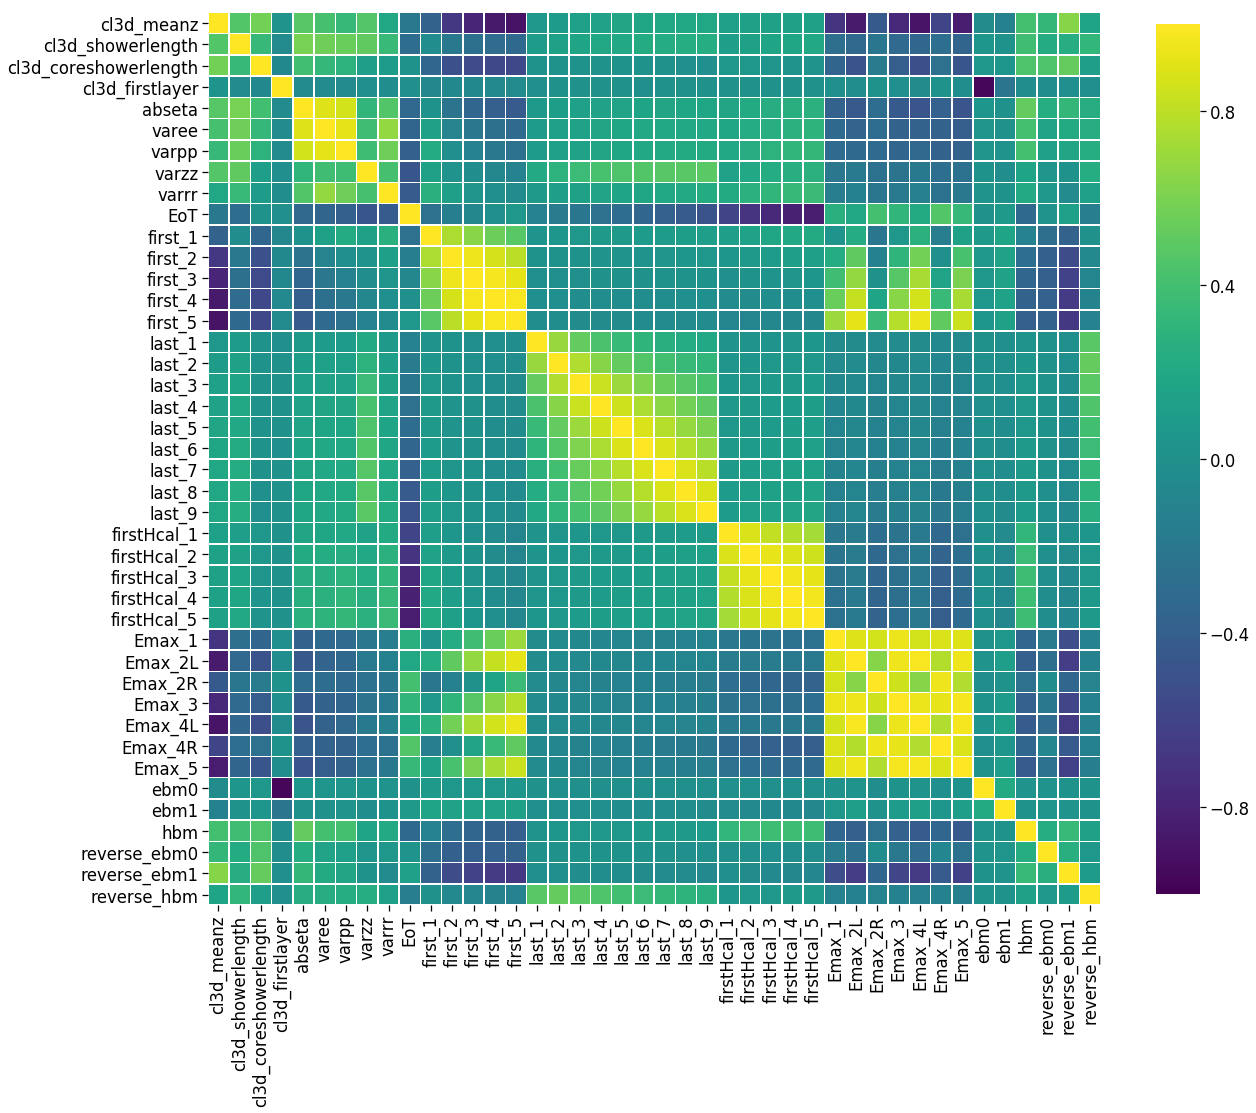

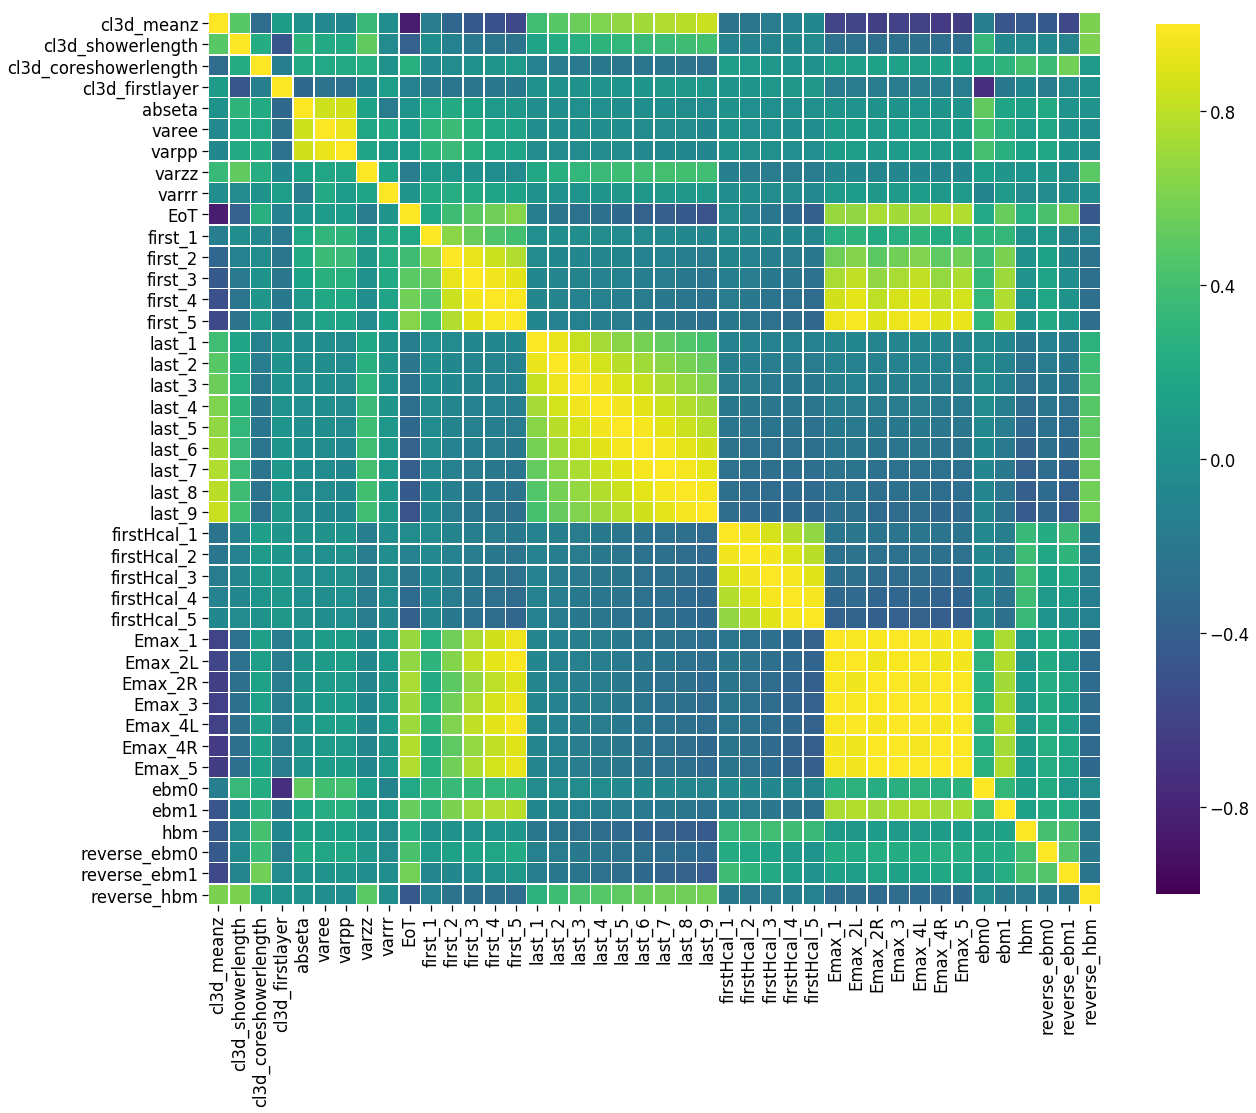

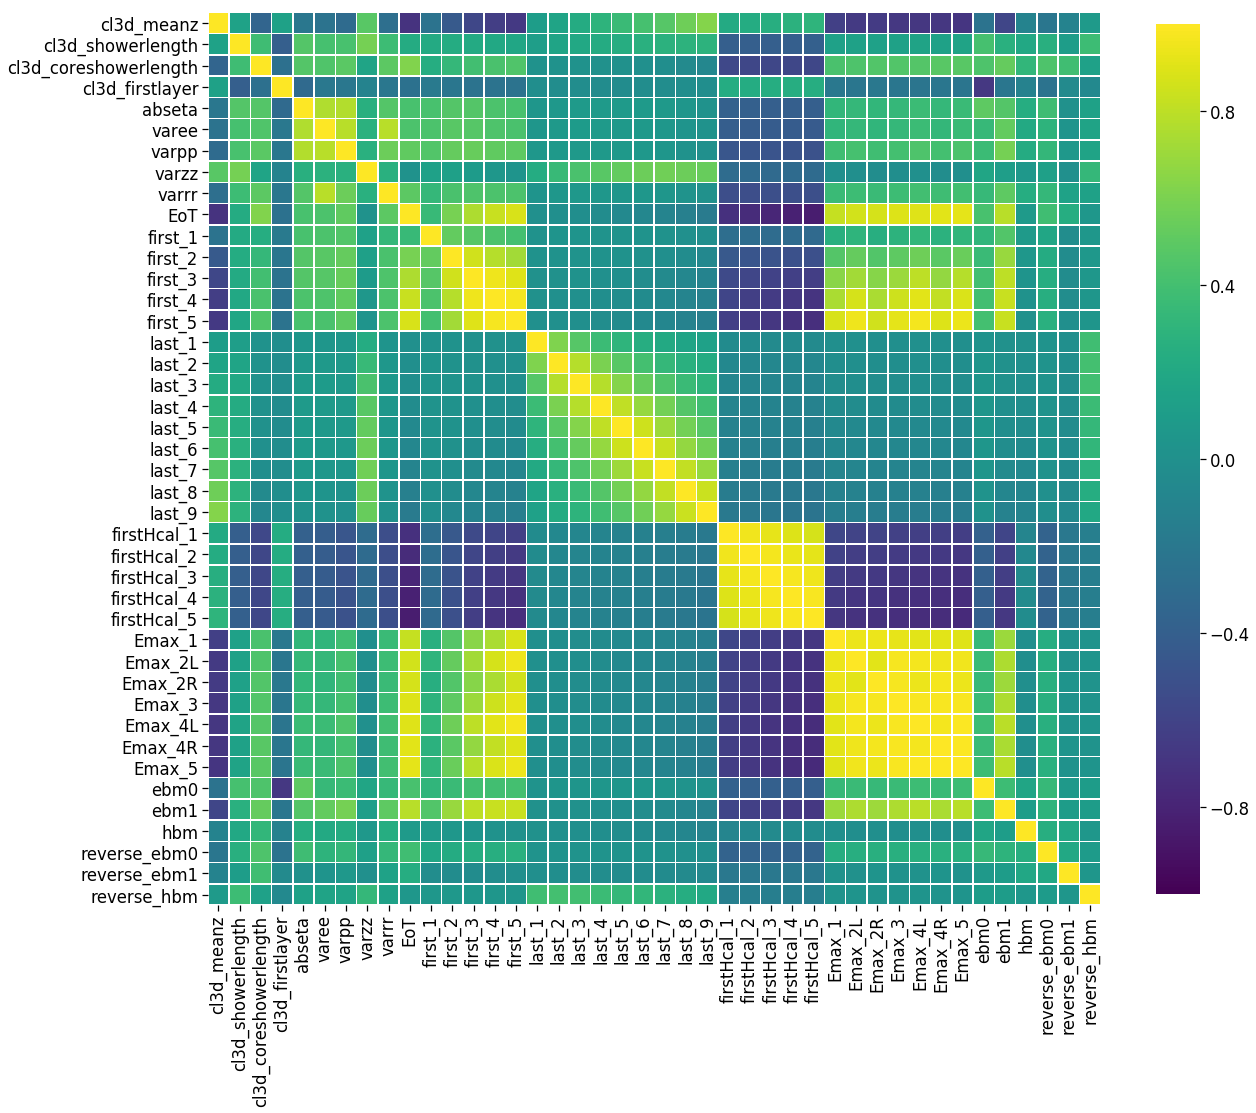

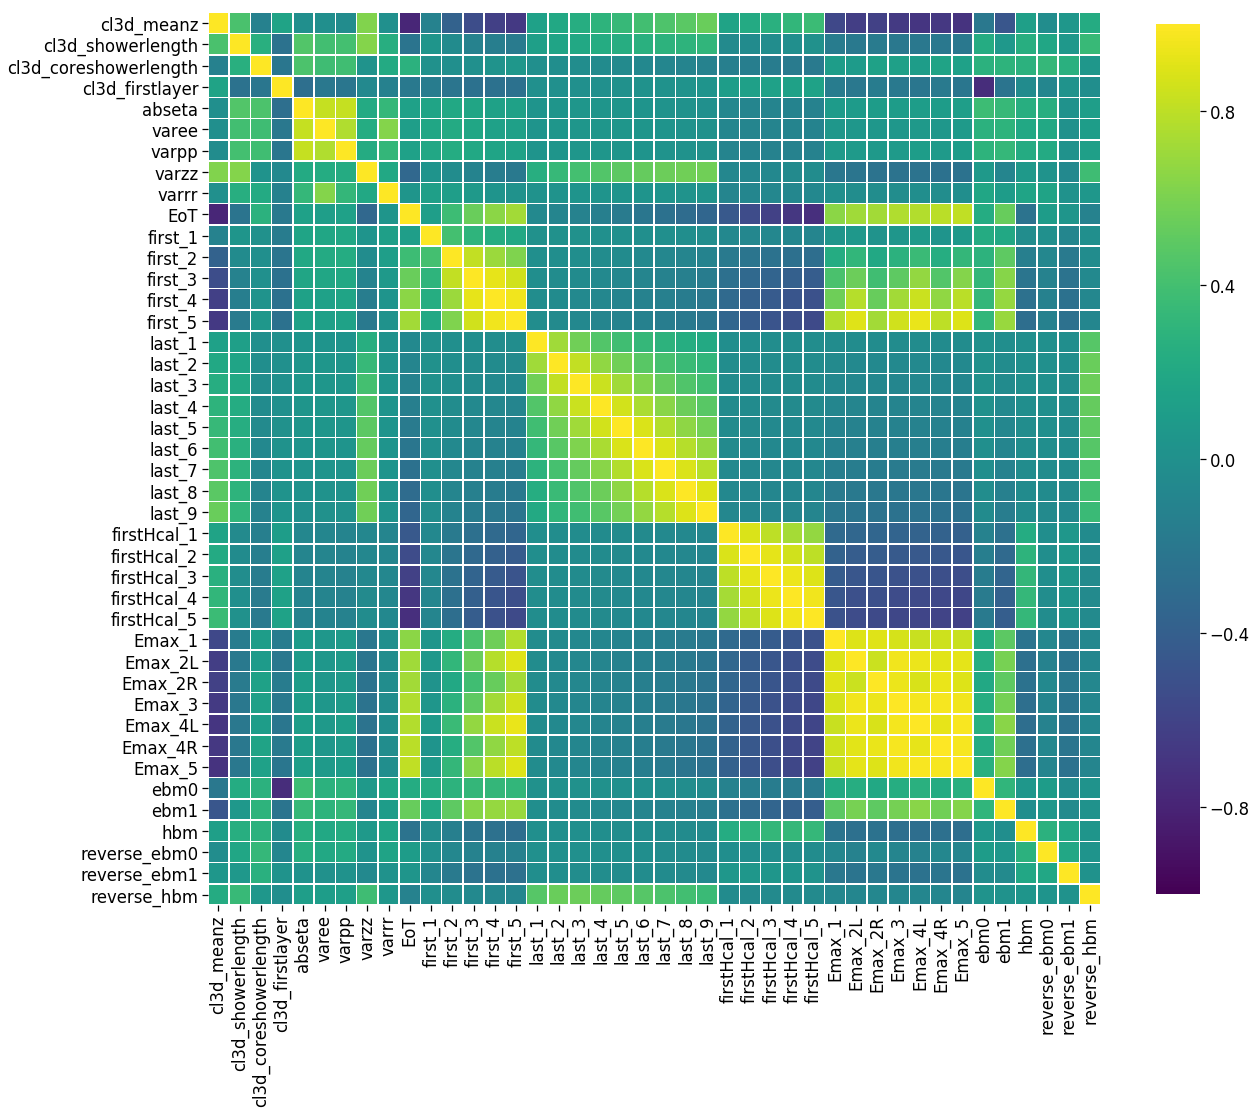

In [7]:
import seaborn as sns
corr={}
feat=['cl3d_meanz','cl3d_showerlength','cl3d_coreshowerlength','cl3d_firstlayer',
                'abseta', 'varee', 'varpp', 'varzz', 'varrr',
                  'EoT', 'first_1', 'first_2',
                'first_3', 'first_4', 'first_5', 'last_1', 'last_2', 'last_3', 'last_4',
                'last_5', 'last_6', 'last_7', 'last_8', 'last_9', 'firstHcal_1', 'firstHcal_2',
                'firstHcal_3', 'firstHcal_4', 'firstHcal_5', 'Emax_1', 'Emax_2L', 'Emax_2R', 'Emax_3',
                'Emax_4L', 'Emax_4R', 'Emax_5', 'ebm0', 'ebm1', 'hbm', 'reverse_ebm0', 'reverse_ebm1', 'reverse_hbm']
for i,sample in enumerate(['elec', 'pions', 'PU', 'QCD']):
    print(sample)
    corr[i]=df_cut[feat][df_cut['sample']==sample].corr()
    plt.figure(figsize=(20,20))
    sns.set_context("notebook", font_scale=1.5)         
    sns_plot=sns.heatmap(corr[i], cmap='viridis', center=0,
                square=True, linewidths=.5,cbar_kws={"shrink": 0.8}, label ='big', vmin=-1, vmax=1)
    fig = sns_plot.get_figure()
    fig.savefig(workdir+'/distrib/corr/{}_corr.png'.format(sample))


In [8]:
def quantize(feat, nbits, method, fmin, fmax): #feat is the feature to quantize, nbist the number of bits, method: 'uniform' or 'percentile'
    nbins= 2**nbits
    if feat.dtype == 'float64':
        method = method
    elif feat.dtype == 'int64':
        method = 'uniform'
    if method == 'uniform':
        bins=np.linspace(fmin, fmax, nbins+1)
    elif method == 'percentile':
        bins=[np.percentile(feat, n) for n in np.linspace(0,100,nbins+1)]
    else :
        print('Error: Invalid method')
        return
    return np.digitize(feat, bins)-1

In [9]:
print(df_cut[feat].min(), df_cut[feat].max())

fmin, fmax= np.percentile(df_cut[feat], 1),np.percentile(df_cut[feat], 99) 

cl3d_meanz               3.221028e+02
cl3d_showerlength        1.000000e+00
cl3d_coreshowerlength    1.000000e+00
cl3d_firstlayer          1.000000e+00
abseta                   1.600029e+00
varee                    1.421085e-14
varpp                    0.000000e+00
varzz                    0.000000e+00
varrr                    0.000000e+00
EoT                      0.000000e+00
first_1                  0.000000e+00
first_2                  0.000000e+00
first_3                  0.000000e+00
first_4                  0.000000e+00
first_5                  0.000000e+00
last_1                   0.000000e+00
last_2                   0.000000e+00
last_3                   0.000000e+00
last_4                   0.000000e+00
last_5                   0.000000e+00
last_6                   0.000000e+00
last_7                   0.000000e+00
last_8                   0.000000e+00
last_9                   0.000000e+00
firstHcal_1              0.000000e+00
firstHcal_2              0.000000e+00
firstHcal_3 

In [10]:
print(fmin, fmax)

0.0 1908736.0


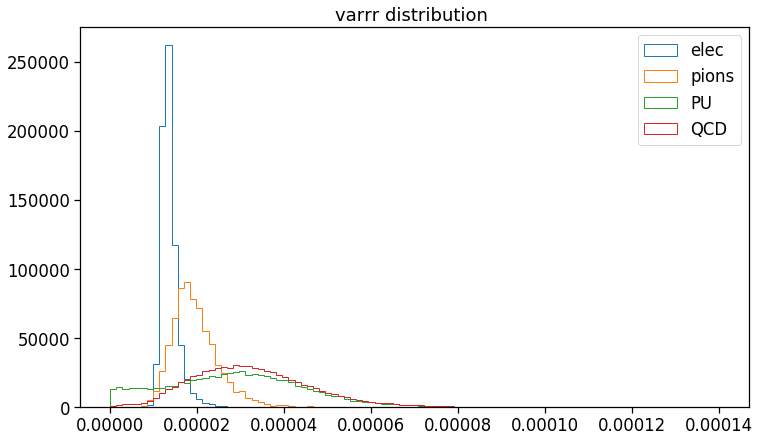

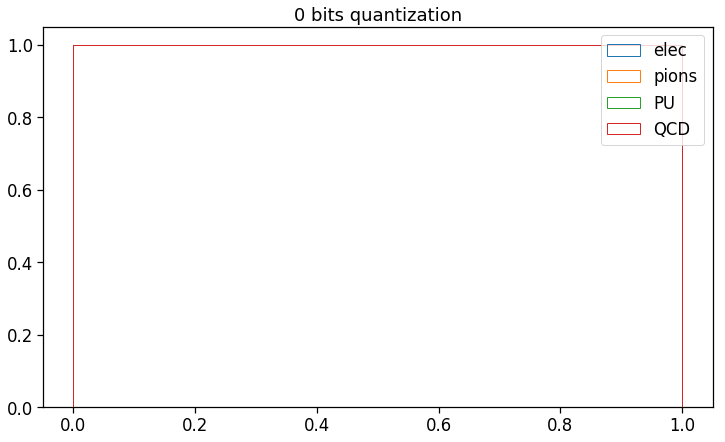

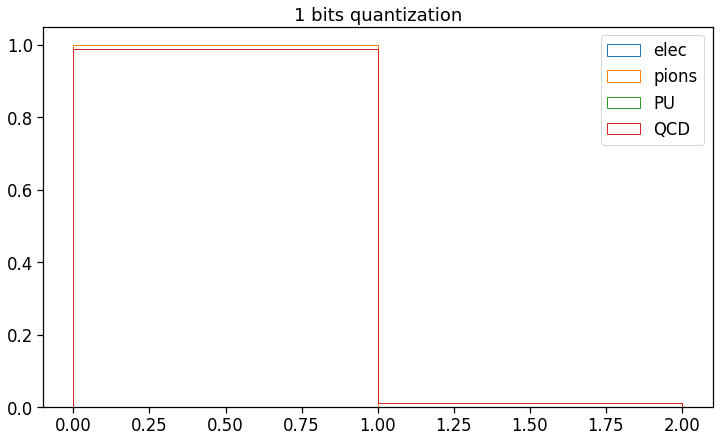

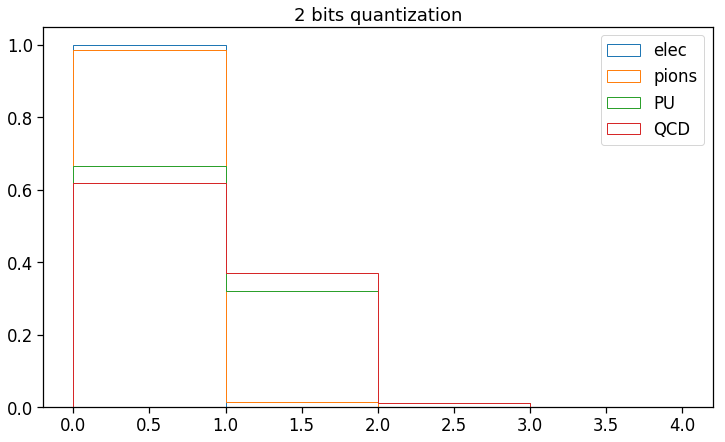

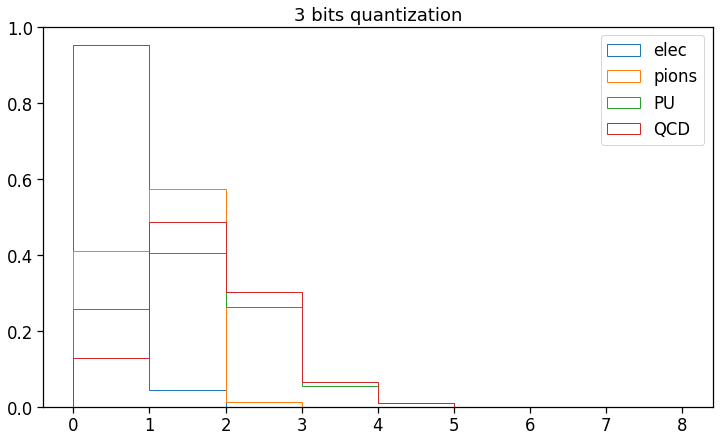

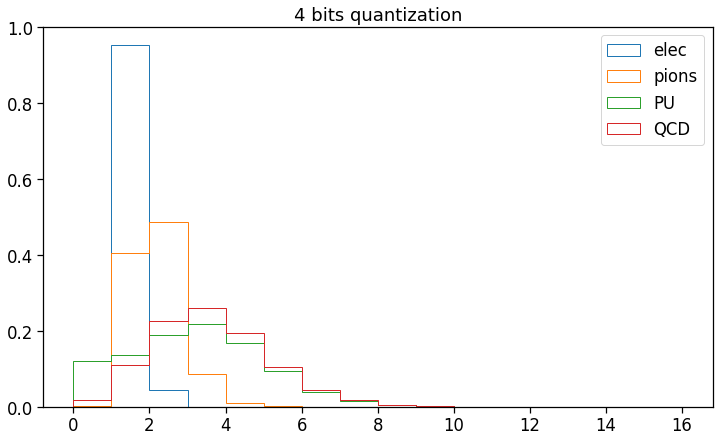

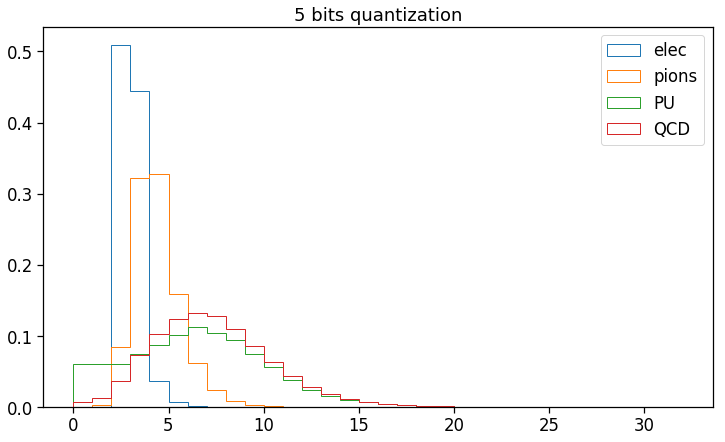

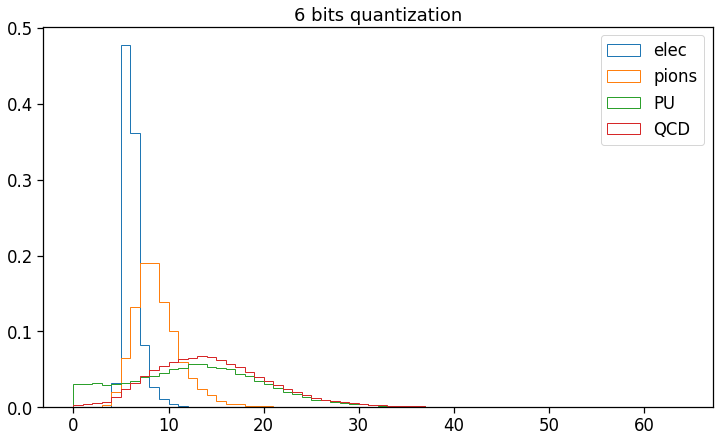

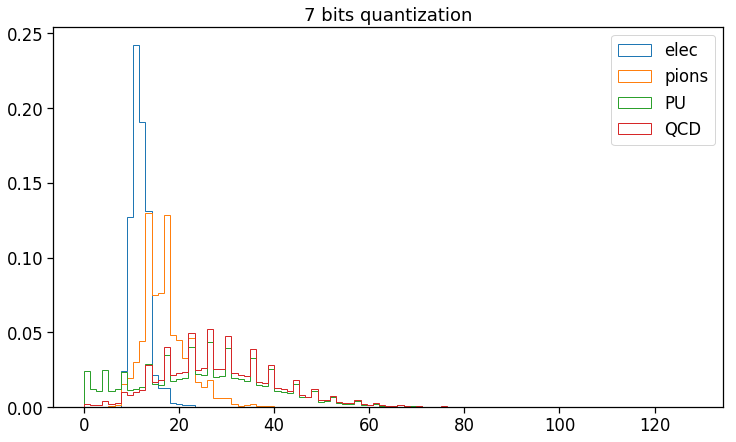

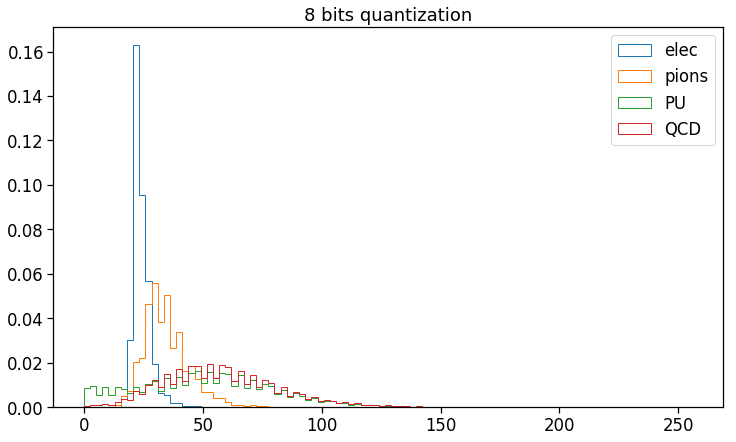

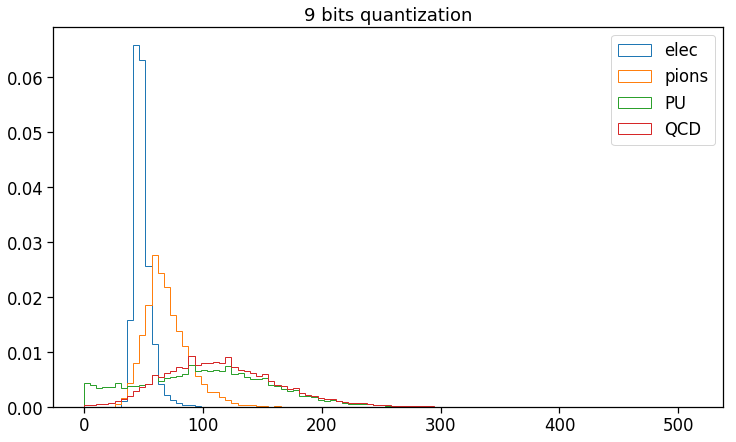

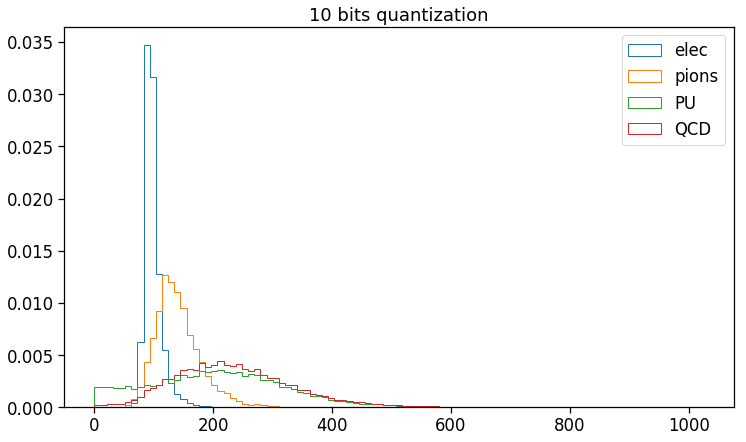

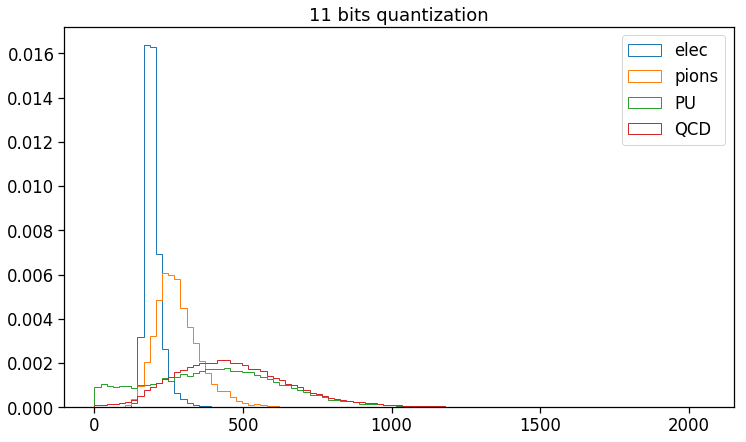

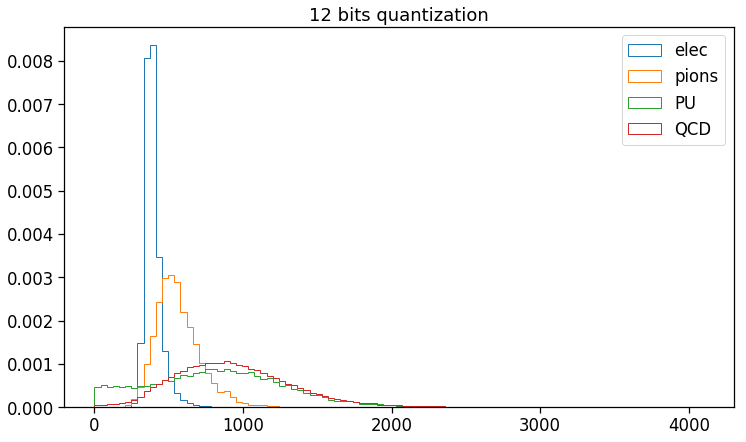

In [11]:
#change quantization range: between 1 and 10th decile?


#plot unquantized and quantized
feat='varrr'
bins=np.linspace(0,0.00014,100)
plt.figure(figsize=(12,7))
plt.hist(df_cut[feat][df_cut['sample']=='elec'], bins=bins, label='elec', density=True, histtype='step')
plt.hist(df_cut[feat][df_cut['sample']=='pions'],bins=bins, label='pions', density=True, histtype='step')
plt.hist(df_cut[feat][df_cut['sample']=='PU'],bins=bins, label='PU', density=True, histtype='step')
plt.hist(df_cut[feat][df_cut['sample']=='QCD'],bins=bins, label='QCD', density=True, histtype='step')
plt.title("{} distribution ".format(feat))
#plt.yscale('log')
#plt.xlim(0,36)
plt.legend()

for n in range(0,13):
    bins= np.linspace(0,2**n,min((2**n)+1, 100))
    plt.savefig(workdir+'/distrib/{}.png'.format(feat))
    nbits= n
    fmin=df_cut[feat].min()
    fmax=df_cut[feat].max()
    plt.figure(figsize=(12,7))
    plt.hist(quantize(df_cut[feat], nbits, 'uniform',fmin , fmax)[df_cut['sample']=='elec'],bins=bins, label='elec', density=True, histtype='step')
    plt.hist(quantize(df_cut[feat], nbits, 'uniform',fmin , fmax)[df_cut['sample']=='pions'],bins=bins, label='pions', density=True, histtype='step')
    plt.hist(quantize(df_cut[feat], nbits, 'uniform',fmin , fmax)[df_cut['sample']=='PU'],bins=bins, label='PU', density=True, histtype='step')
    plt.hist(quantize(df_cut[feat], nbits, 'uniform',fmin , fmax)[df_cut['sample']=='QCD'],bins=bins, label='QCD', density=True, histtype='step')
    plt.title("{} distribution ".format(feat))
    #plt.yscale('log')
    #plt.xlim(0,36)
    plt.legend()
    plt.title('{} bits quantization'.format(n))




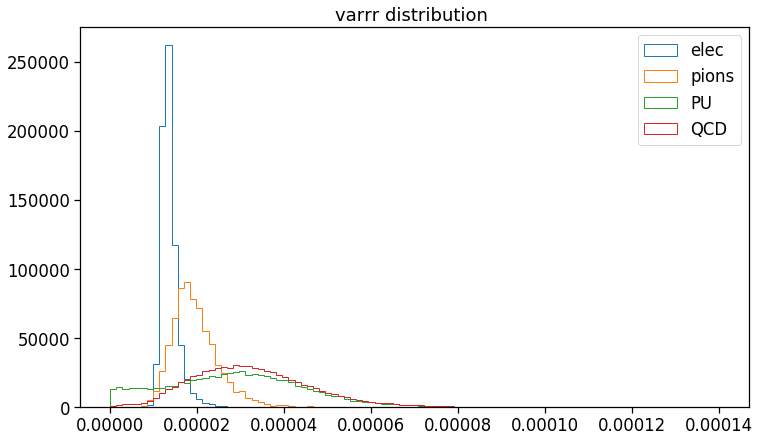

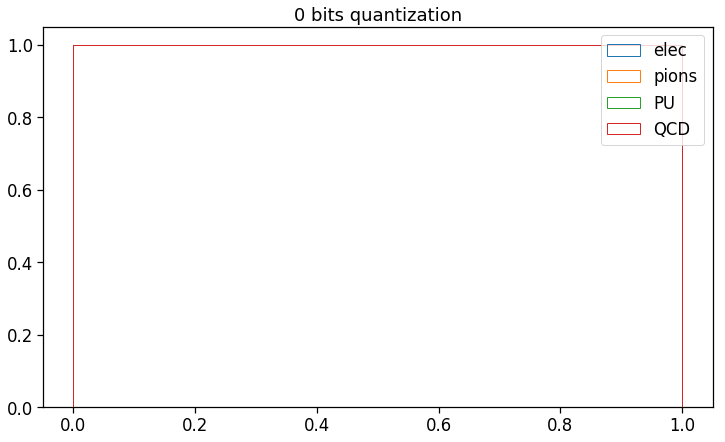

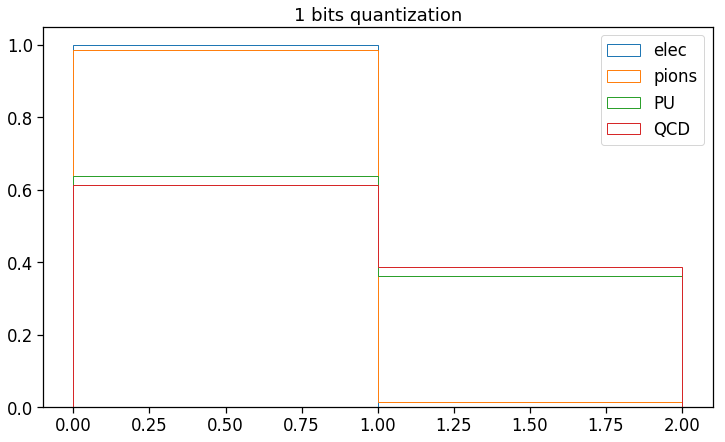

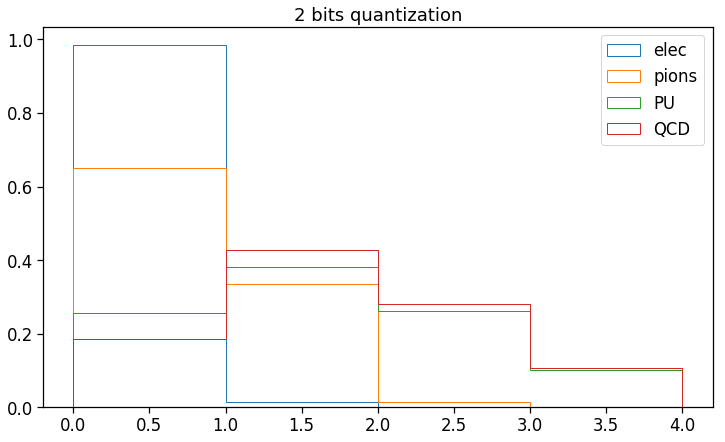

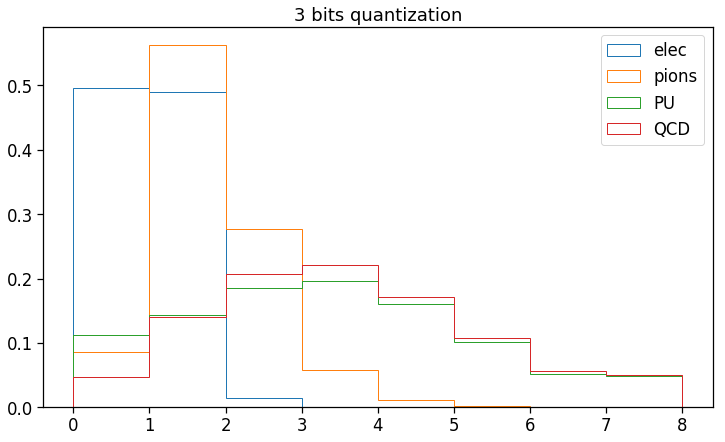

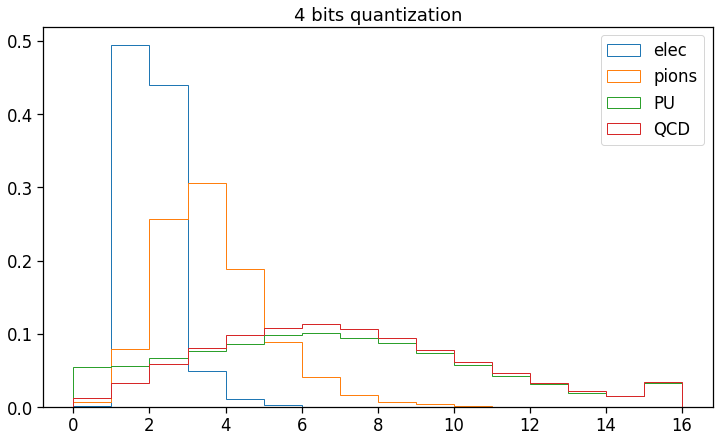

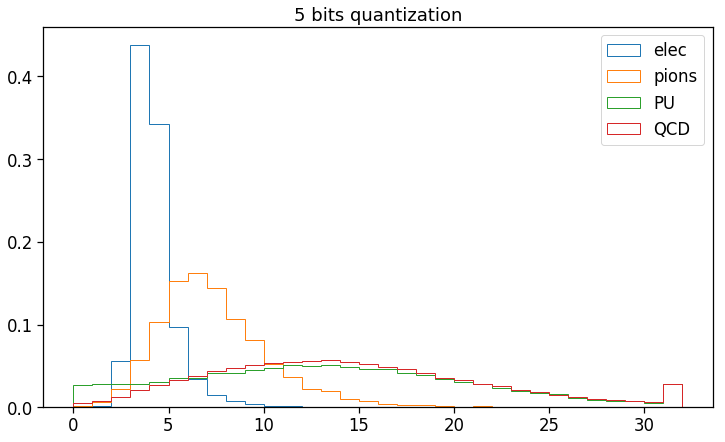

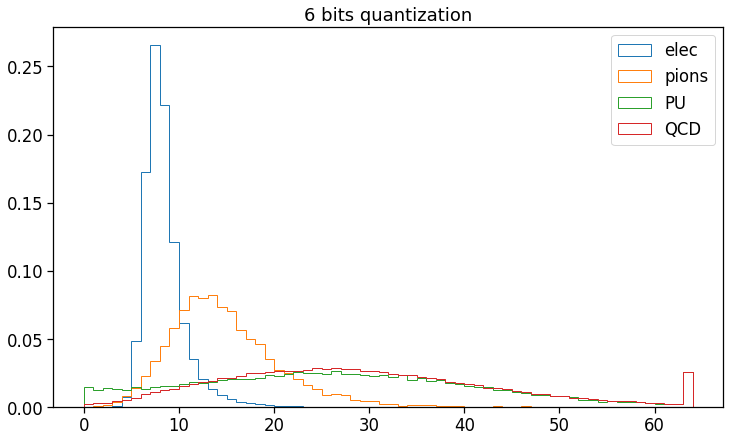

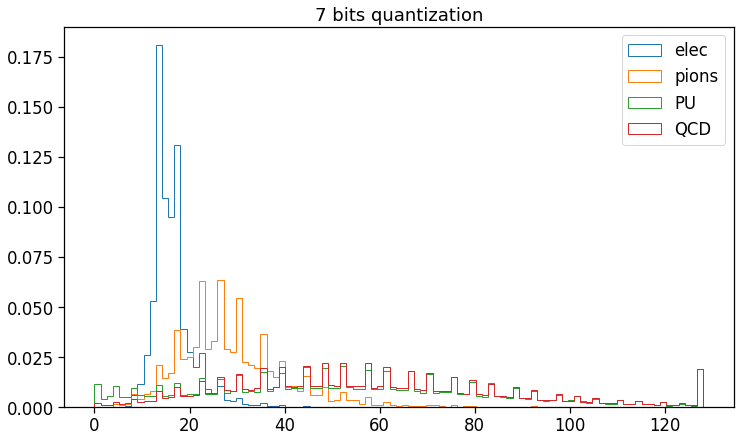

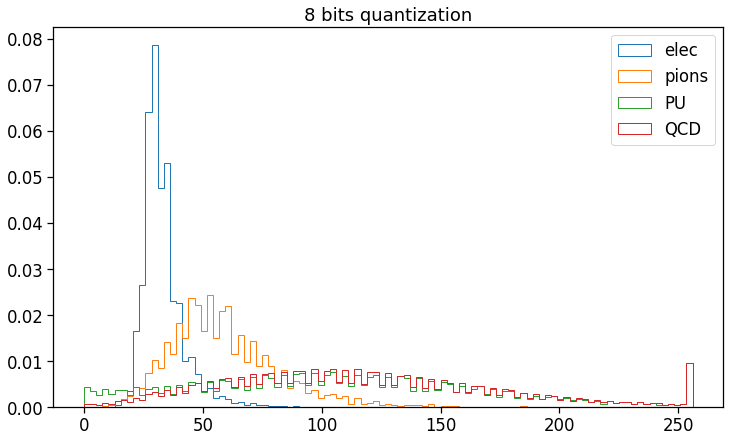

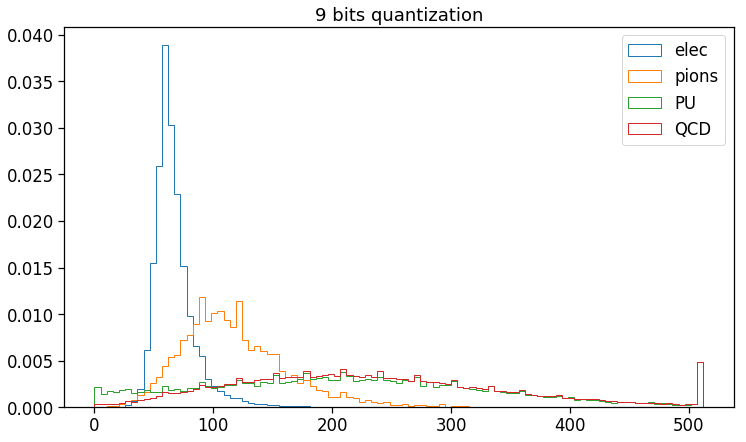

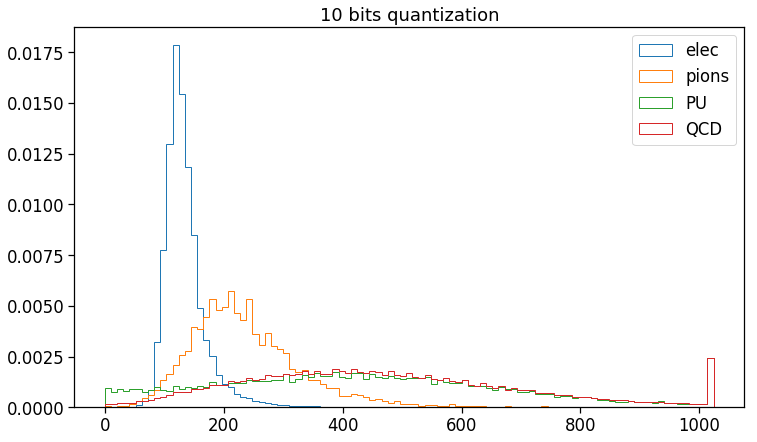

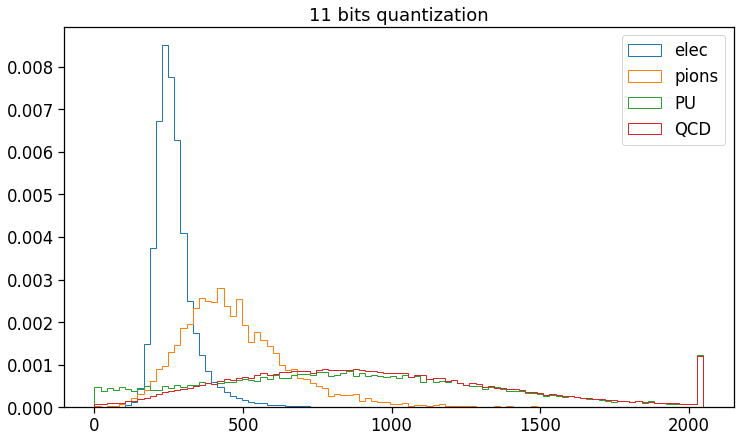

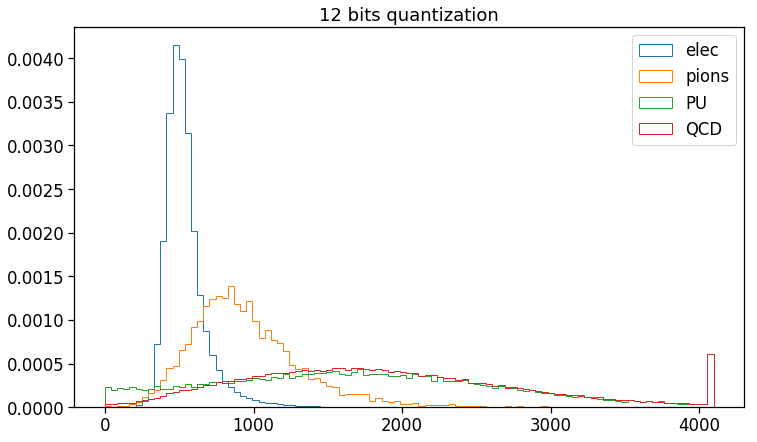

In [12]:
#change quantization range: between 1 and 10th decile?


#plot unquantized and quantized
feat='varrr'
bins=np.linspace(0,0.00014,100)
plt.figure(figsize=(12,7))
plt.hist(df_cut[feat][df_cut['sample']=='elec'], bins=bins, label='elec', density=True, histtype='step')
plt.hist(df_cut[feat][df_cut['sample']=='pions'],bins=bins, label='pions', density=True, histtype='step')
plt.hist(df_cut[feat][df_cut['sample']=='PU'],bins=bins, label='PU', density=True, histtype='step')
plt.hist(df_cut[feat][df_cut['sample']=='QCD'],bins=bins, label='QCD', density=True, histtype='step')
plt.title("{} distribution ".format(feat))
#plt.yscale('log')
#plt.xlim(0,36)
plt.legend()

for n in range(0,13):
    bins= np.linspace(0,2**n,min((2**n)+1, 100))
    plt.savefig(workdir+'/distrib/{}.png'.format(feat))
    nbits= n
    fmin, fmax= np.percentile(df_cut[feat], 1),np.percentile(df_cut[feat], 99) 
    #fmin=df_cut[feat].min()
    #fmax=df_cut[feat].max()
    plt.figure(figsize=(12,7))
    plt.hist(quantize(df_cut[feat], nbits, 'uniform',fmin , fmax)[df_cut['sample']=='elec'],bins=bins, label='elec', density=True, histtype='step')
    plt.hist(quantize(df_cut[feat], nbits, 'uniform',fmin , fmax)[df_cut['sample']=='pions'],bins=bins, label='pions', density=True, histtype='step')
    plt.hist(quantize(df_cut[feat], nbits, 'uniform',fmin , fmax)[df_cut['sample']=='PU'],bins=bins, label='PU', density=True, histtype='step')
    plt.hist(quantize(df_cut[feat], nbits, 'uniform',fmin , fmax)[df_cut['sample']=='QCD'],bins=bins, label='QCD', density=True, histtype='step')
    plt.title("{} distribution ".format(feat))
    #plt.yscale('log')
    #plt.xlim(0,36)
    plt.legend()
    plt.title('{} bits quantization'.format(n))





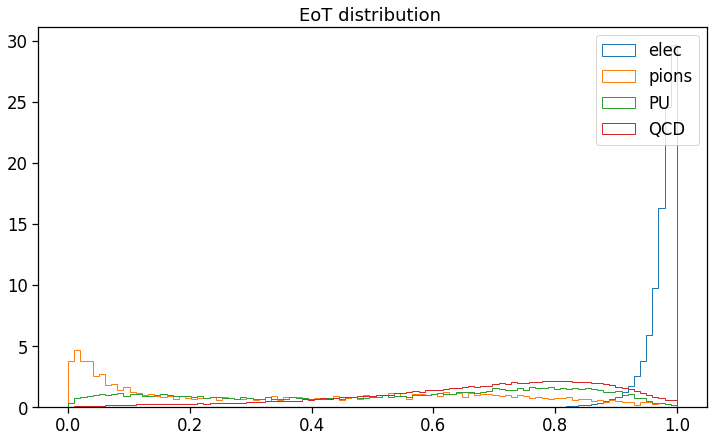

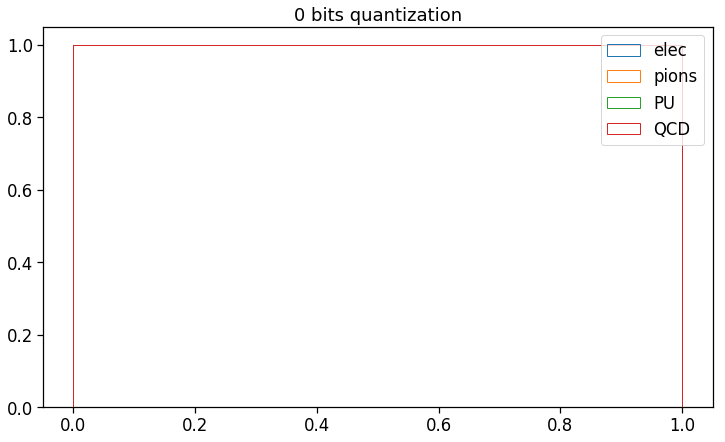

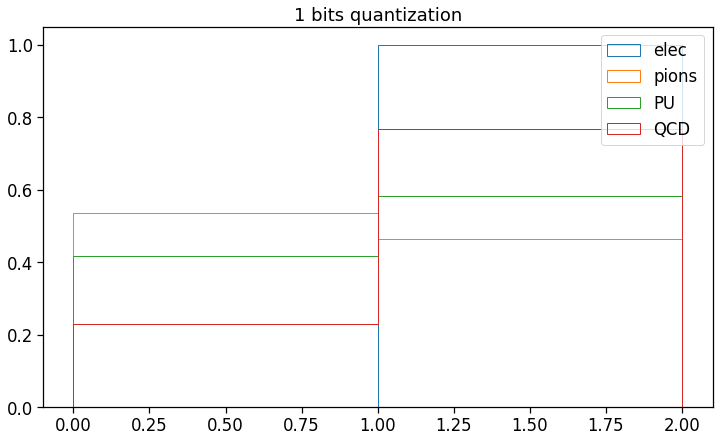

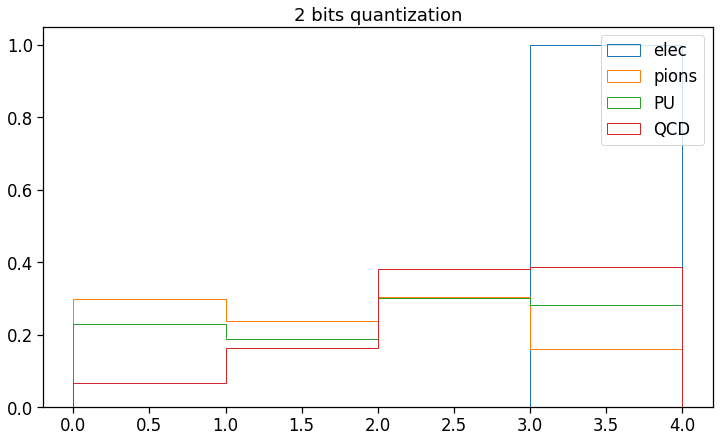

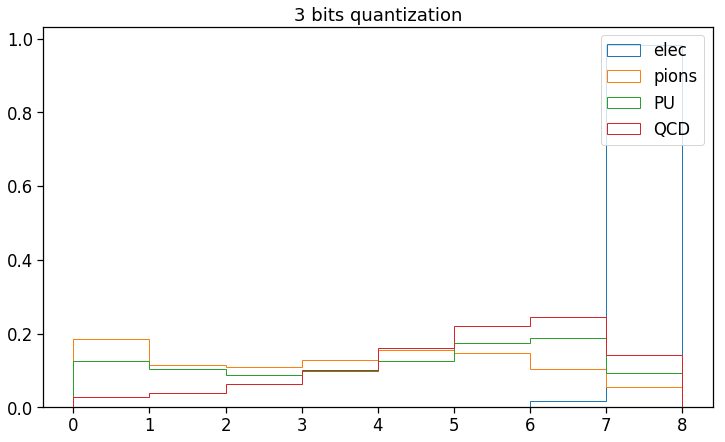

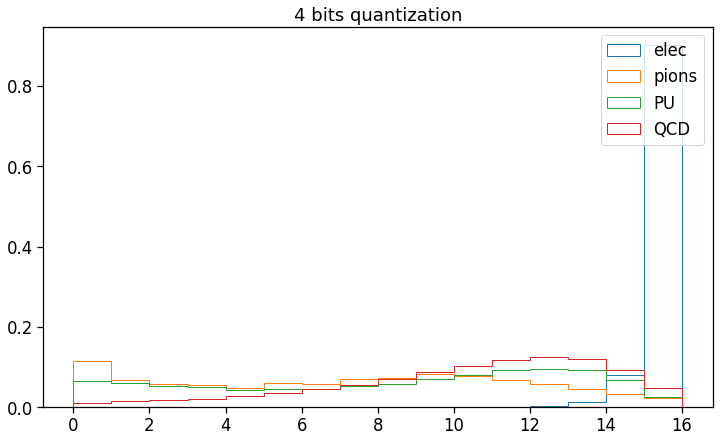

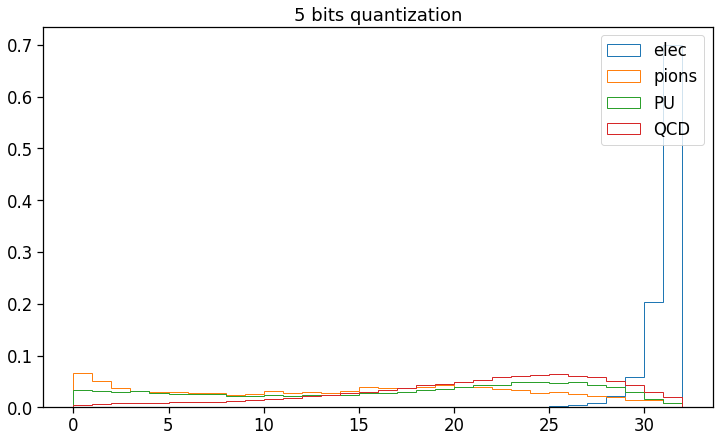

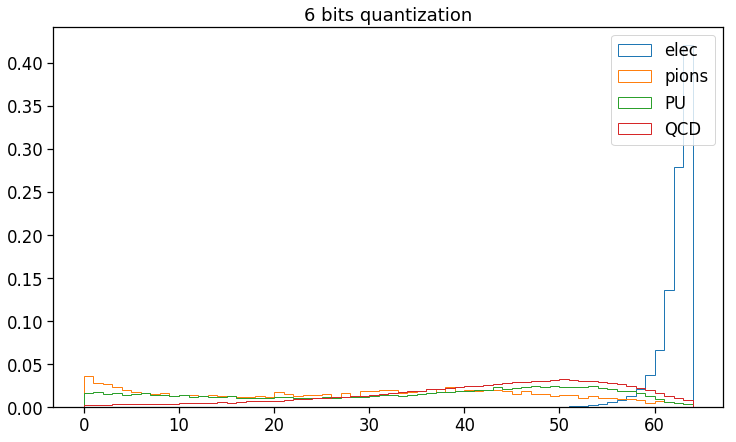

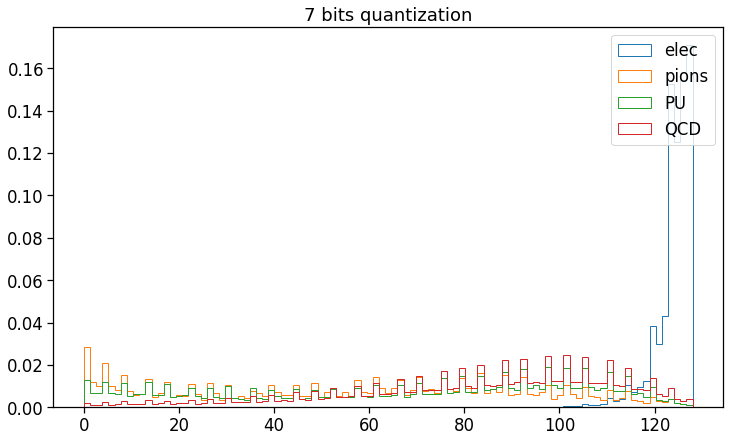

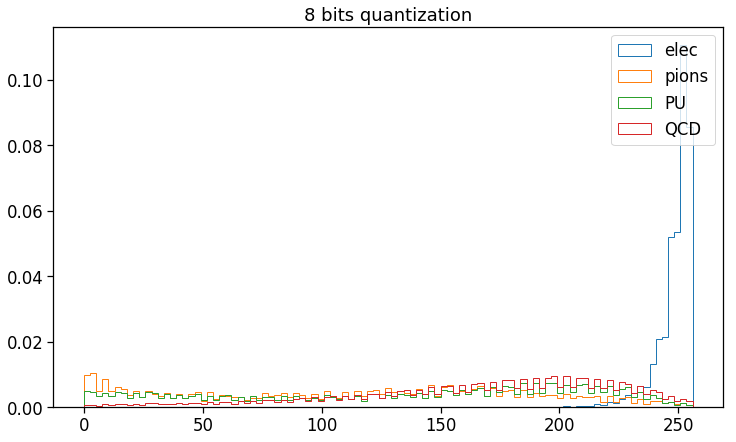

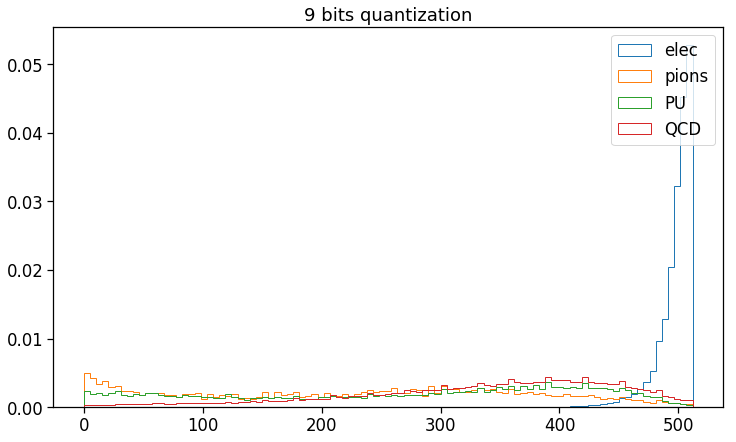

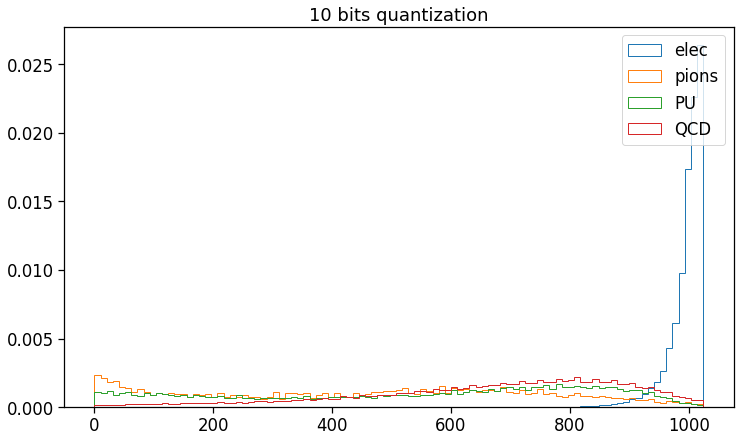

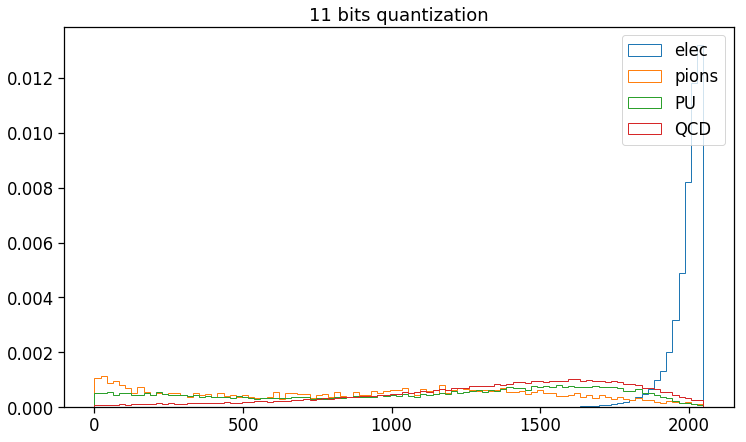

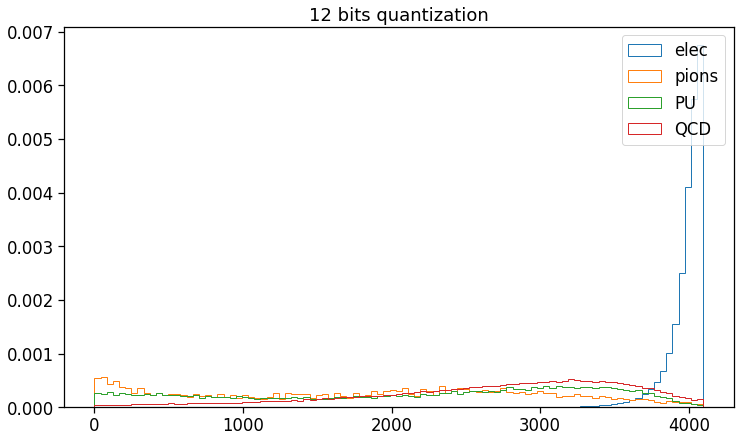

In [13]:
#change quantization range: between 1 and 10th decile?


#plot unquantized and quantized
feat='EoT'
bins=np.linspace(0,1,100)
plt.figure(figsize=(12,7))
plt.hist(df_cut[feat][df_cut['sample']=='elec'], bins=bins, label='elec', density=True, histtype='step')
plt.hist(df_cut[feat][df_cut['sample']=='pions'],bins=bins, label='pions', density=True, histtype='step')
plt.hist(df_cut[feat][df_cut['sample']=='PU'],bins=bins, label='PU', density=True, histtype='step')
plt.hist(df_cut[feat][df_cut['sample']=='QCD'],bins=bins, label='QCD', density=True, histtype='step')
plt.title("{} distribution ".format(feat))
#plt.yscale('log')
#plt.xlim(0,36)
plt.legend()

for n in range(0,13):
    bins= np.linspace(0,2**n,min((2**n)+1, 100))
    plt.savefig(workdir+'/distrib/{}.png'.format(feat))
    nbits= n
    fmin, fmax= np.percentile(df_cut[feat], 1),np.percentile(df_cut[feat], 99) 
    #fmin=df_cut[feat].min()
    #fmax=df_cut[feat].max()
    plt.figure(figsize=(12,7))
    plt.hist(quantize(df_cut[feat], nbits, 'uniform',fmin , fmax)[df_cut['sample']=='elec'],bins=bins, label='elec', density=True, histtype='step')
    plt.hist(quantize(df_cut[feat], nbits, 'uniform',fmin , fmax)[df_cut['sample']=='pions'],bins=bins, label='pions', density=True, histtype='step')
    plt.hist(quantize(df_cut[feat], nbits, 'uniform',fmin , fmax)[df_cut['sample']=='PU'],bins=bins, label='PU', density=True, histtype='step')
    plt.hist(quantize(df_cut[feat], nbits, 'uniform',fmin , fmax)[df_cut['sample']=='QCD'],bins=bins, label='QCD', density=True, histtype='step')
    plt.title("{} distribution ".format(feat))
    #plt.yscale('log')
    #plt.xlim(0,36)
    plt.legend()
    plt.title('{} bits quantization'.format(n))





In [14]:
quantize(df_cut[feat][df_cut['sample']=='pions'], nbits, 'uniform',df_cut[feat].min() , df_cut[feat].max())

array([ 130, 2230,   27, ..., 2338,  163, 3788])

In [15]:
a=quantize(df_cut[feat][df_cut['sample']=='elec'], nbits, 'uniform',df_cut[feat][df_cut['sample']=='elec'].min() , df_cut[feat][df_cut['sample']=='elec'].max())

(array([0.00228682, 0.        , 0.00914729, 0.00228682, 0.01143411,
        0.00686047, 0.00686047, 0.01600775, 0.00457364, 0.01143411,
        0.00914729, 0.00686047, 0.01143411, 0.01372093, 0.0205814 ,
        0.0205814 , 0.01600775, 0.01372093, 0.02286822, 0.02286822,
        0.01600775, 0.01829457, 0.02515504, 0.01143411, 0.00686047,
        0.02972868, 0.02286822, 0.0205814 , 0.01600775, 0.01143411,
        0.01600775, 0.01372093, 0.0205814 , 0.02515504, 0.00914729,
        0.01829457, 0.01372093, 0.0205814 , 0.0205814 , 0.02515504,
        0.02515504, 0.01829457, 0.0205814 , 0.02972868, 0.02744186,
        0.01143411, 0.01143411, 0.0205814 , 0.01600775, 0.02972868,
        0.01829457, 0.0205814 , 0.01829457, 0.01829457, 0.01372093,
        0.0320155 , 0.01600775, 0.01829457, 0.02744186]),
 array([ 0.        ,  1.01694915,  2.03389831,  3.05084746,  4.06779661,
         5.08474576,  6.10169492,  7.11864407,  8.13559322,  9.15254237,
        10.16949153, 11.18644068, 12.20338983, 1

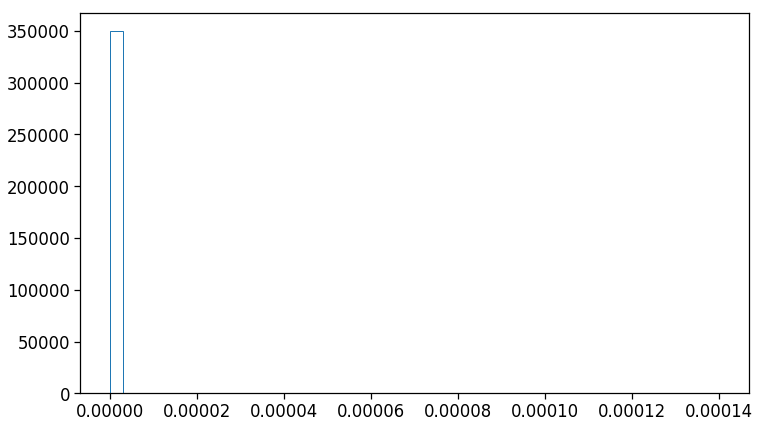

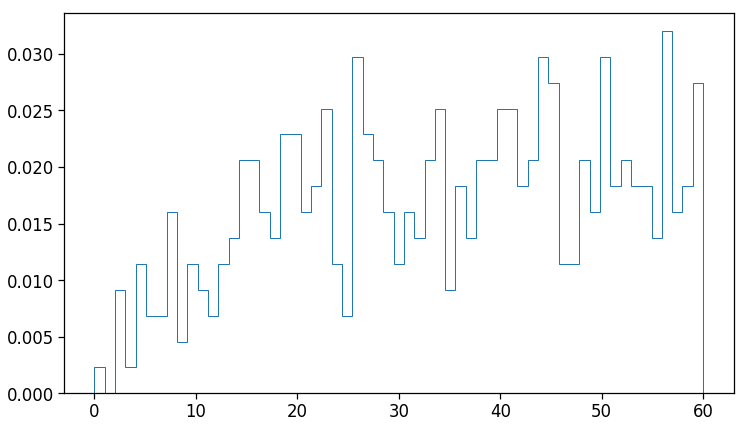

In [16]:
bins=np.linspace(0,0.00014,50)
plt.figure(figsize=(12,7))
plt.hist(df_cut[feat][df_cut['sample']=='pions'],bins=bins, label='pions', density=True, histtype='step')
bins= np.linspace(0,60,60)
plt.figure(figsize=(12,7))
plt.hist(quantize(df_cut[feat][df_cut['sample']=='pions'], nbits, 'uniform',df_cut[feat][df_cut['sample']=='pions'].min() , df_cut[feat][df_cut['sample']=='pions'].max()),bins=bins, label='pions', density=True, histtype='step')